Bethe ansatz solver

Set up

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 20 21:31:20 2022

@author: Darren
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rc
from scipy import optimize
from scipy import stats
from scipy.special import erf

plt.rcParams['font.size'] = '14'

#Size of the box
boxSize = 100
#Density d = N/L, N is the number of particles in the system
densities = np.linspace(0, 3.5, 100)

#The integers/quantum numbers
def ints(N):
    return np.arange(-(N-1)/2, (N-1)/2+1, 1)

#(Vectorised) Bethe ansatz equations
def BAeqs(x):
    deltaXs = x-x[:, np.newaxis]
    thetaMat = θ(deltaXs)
    equations = x - 2*np.pi/boxSize * ints(np.size(x)) - np.sum(thetaMat, axis=0)/boxSize
    return equations

#Total energy
def energy(p):
    return 0.5*np.sum(np.square(p))

#Total momentum
def momentum(p):
    return np.sum(p)

#Phase shift

In [2]:
def θ(x):
    if λ==0:
        p = -np.pi*np.sign(x)
    else:
        p = (λ-1)*np.pi*erf(x/λ)
    return p

Exact e0 for inverse-square potential

In [3]:
def solution(x):
    return (np.pi**2)*(x**3)*(λ**2)/6

Selected λs

In [4]:
λs = np.array([0, 0.5, 1, 1.5, 2])

Phase shift graph

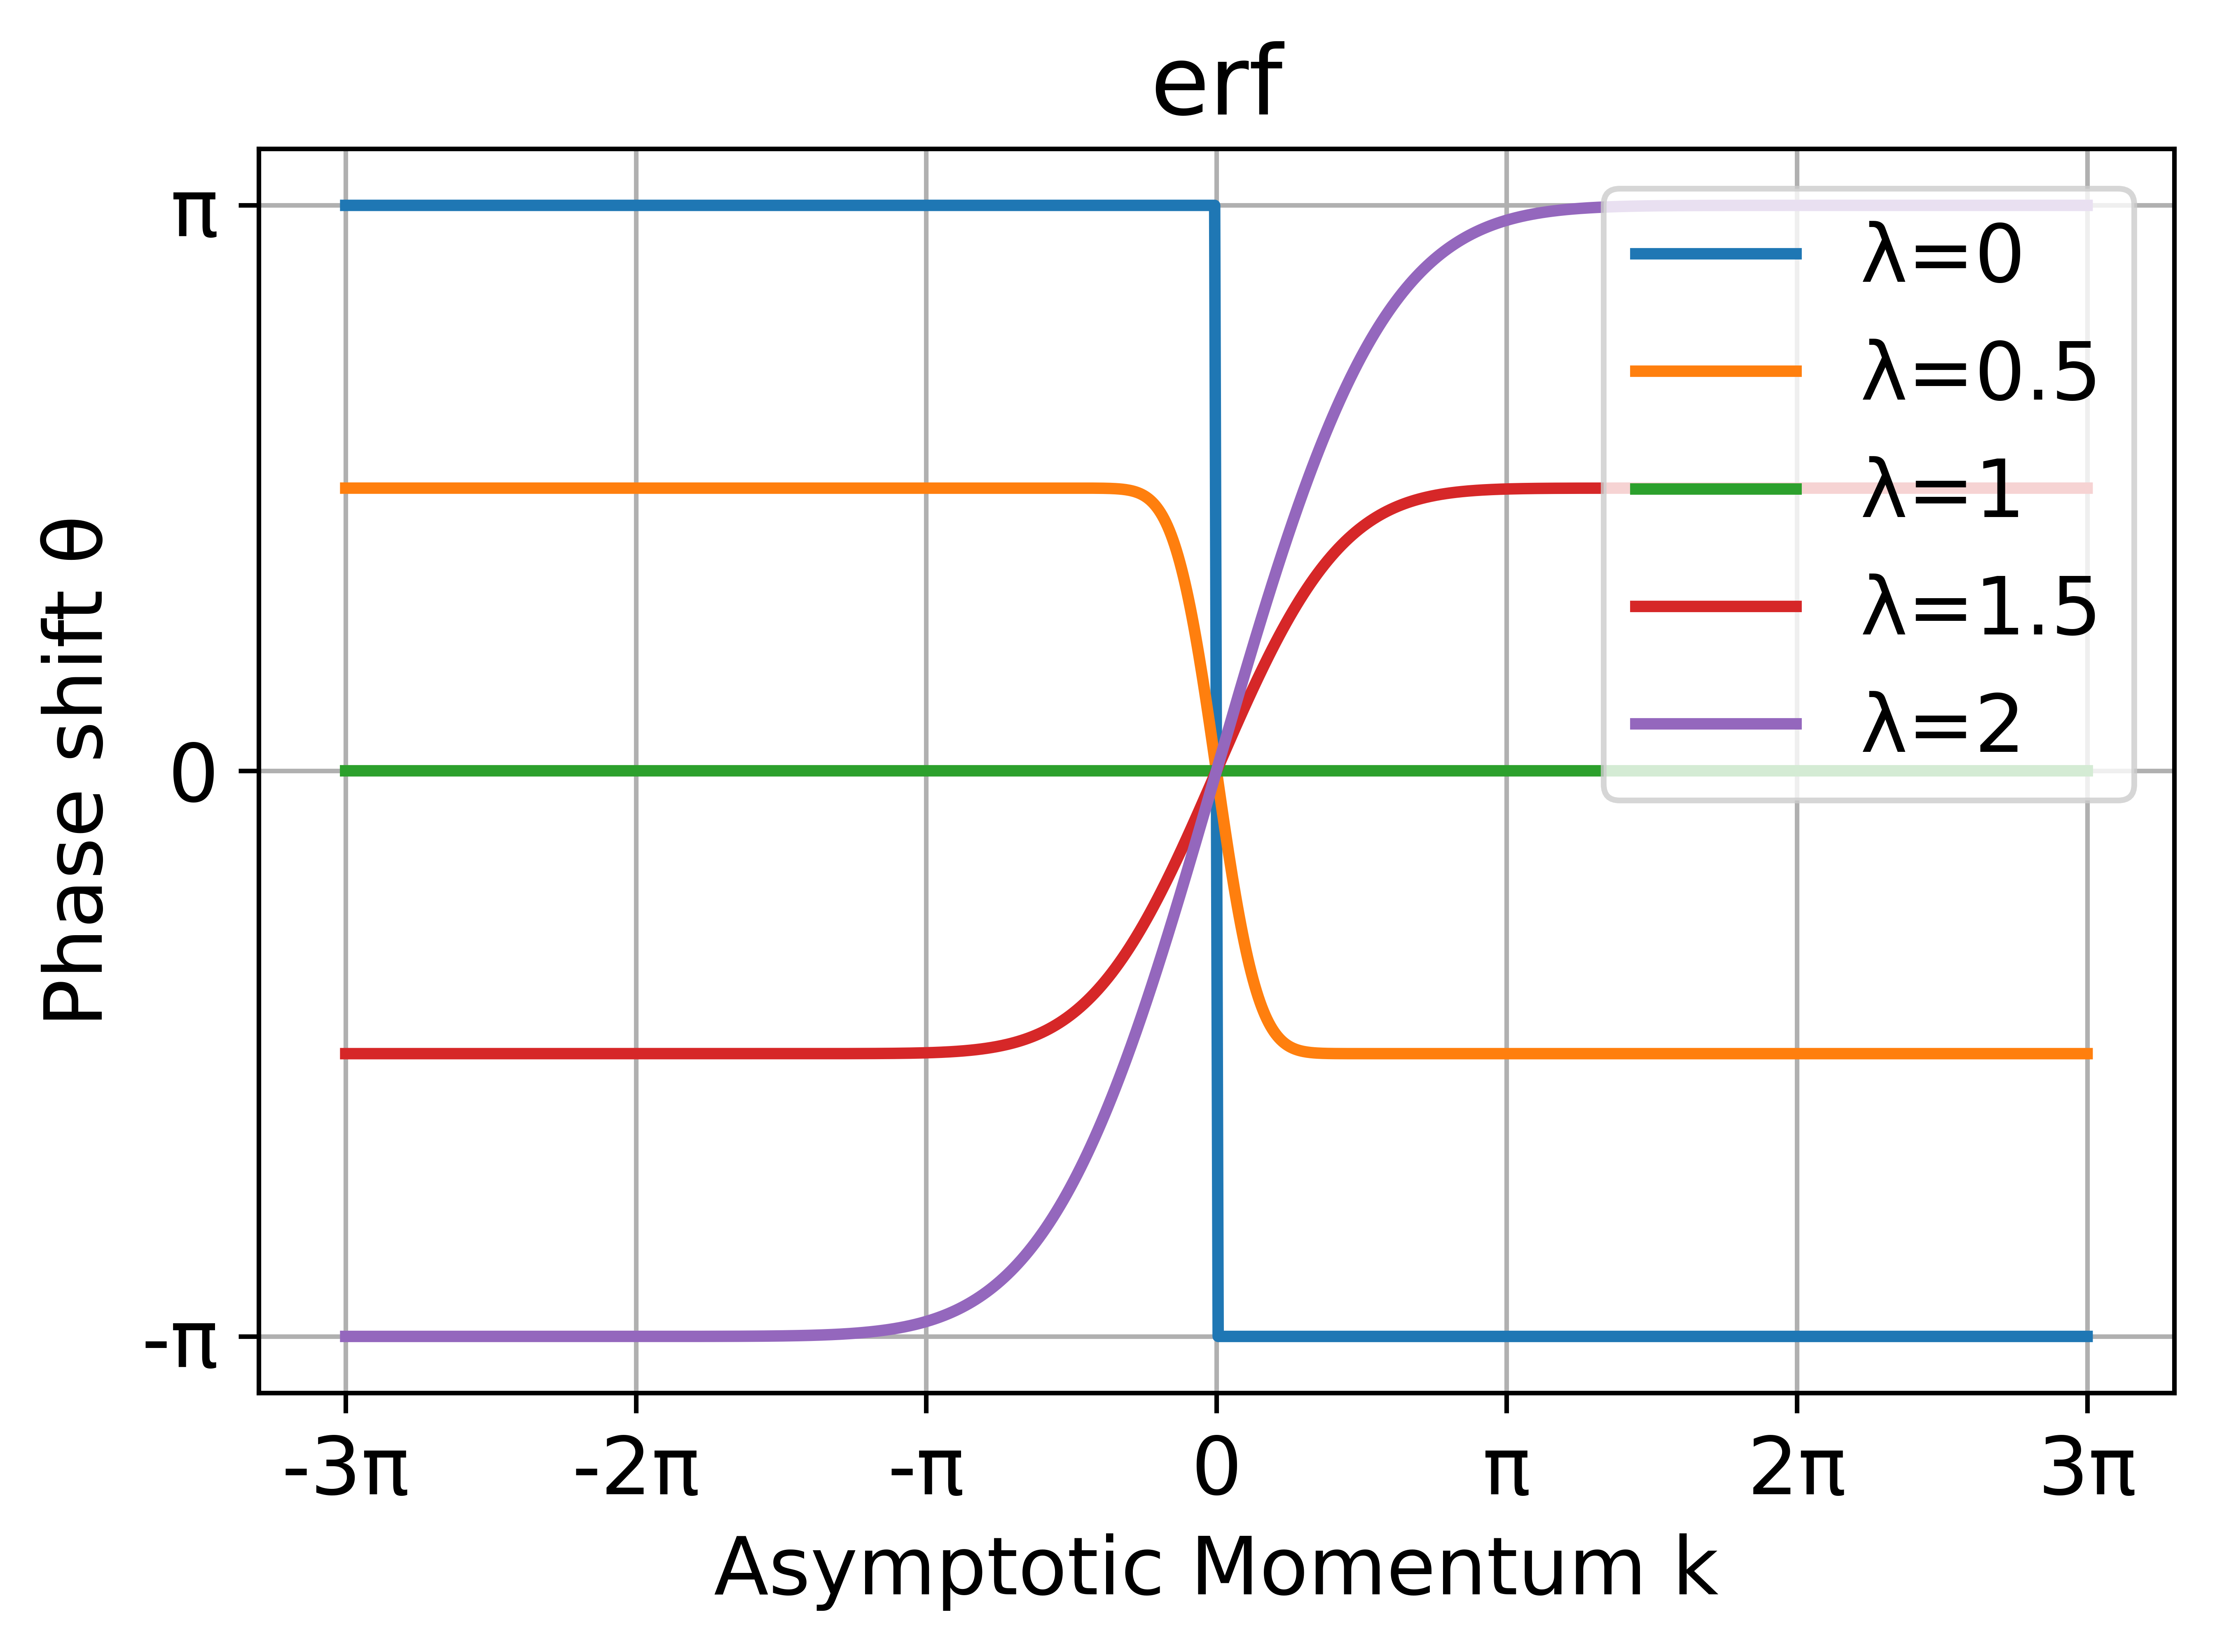

In [5]:
plt.figure(dpi=1000)
plt.xlabel('Asymptotic Momentum k')
plt.ylabel('Phase shift θ')
plt.title('erf')
ksForPlot = np.linspace(-3*np.pi, 3*np.pi, 1001)

for i in range(np.size(λs)):
    λ = λs[i]
    plt.plot(ksForPlot, θ(ksForPlot), label = "λ=%g"%λs[i], linewidth = 2)

plt.xticks(np.arange(-3*np.pi, 3*np.pi+np.pi, step=(np.pi)), ['-3π','-2π','-π','0','π','2π','3π'])
plt.yticks(np.arange(-np.pi, np.pi+np.pi, step=(np.pi)), ['-π','0','π'])
plt.grid()
plt.legend()
plt.show()

Solving

In [6]:
# e0 = []
# ks = []
# normks = []
# for i in λs:
#     arr = []
#     arr1 = []
#     arr2 = []
#     for j in range(np.size(densities)):
#         N = int(densities[j] * boxSize)
#         λ = i
#         init = 2*np.pi*ints(N)/boxSize
#         if N!=0:
#             sol = optimize.root(BAeqs, init, method = 'lm', tol = 1e-15)
#             k = sol.x
#             if np.amax(k)!=0:
#                 normk = k /np.amax(k)
#             else:
#                 normk = k
#         else:
#             k=0
#             normk=0
#         arr1.append(k)
#         arr2.append(normk)
#         enr = energy(k)/boxSize
#         mom = momentum(k)
#         arr.append(enr)
#     e0.append(arr)
#     ks.append(arr1)
#     normks.append(arr2)


Export data

In [7]:
# file = open("erf ks.txt", "w+")
# content = str(ks)
# file.write(content)
# file.close

# file = open("erf normks.txt", "w+")
# content = str(normks)
# file.write(content)
# file.close

# file = open("erf e0.txt", "w+")
# content = str(e0)
# file.write(content)
# file.close

# np.save('erf ks.npy', ks)
# np.save('erf normks.npy', normks)
# np.save('erf e0.npy', e0)

C:\Users\Darren\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Import data

In [8]:
ks = np.load('erf ks.npy', allow_pickle = True)
normks = np.load('erf normks.npy', allow_pickle = True)
e0 = np.load('erf e0.npy', allow_pickle = True)

Plotting e0(d)

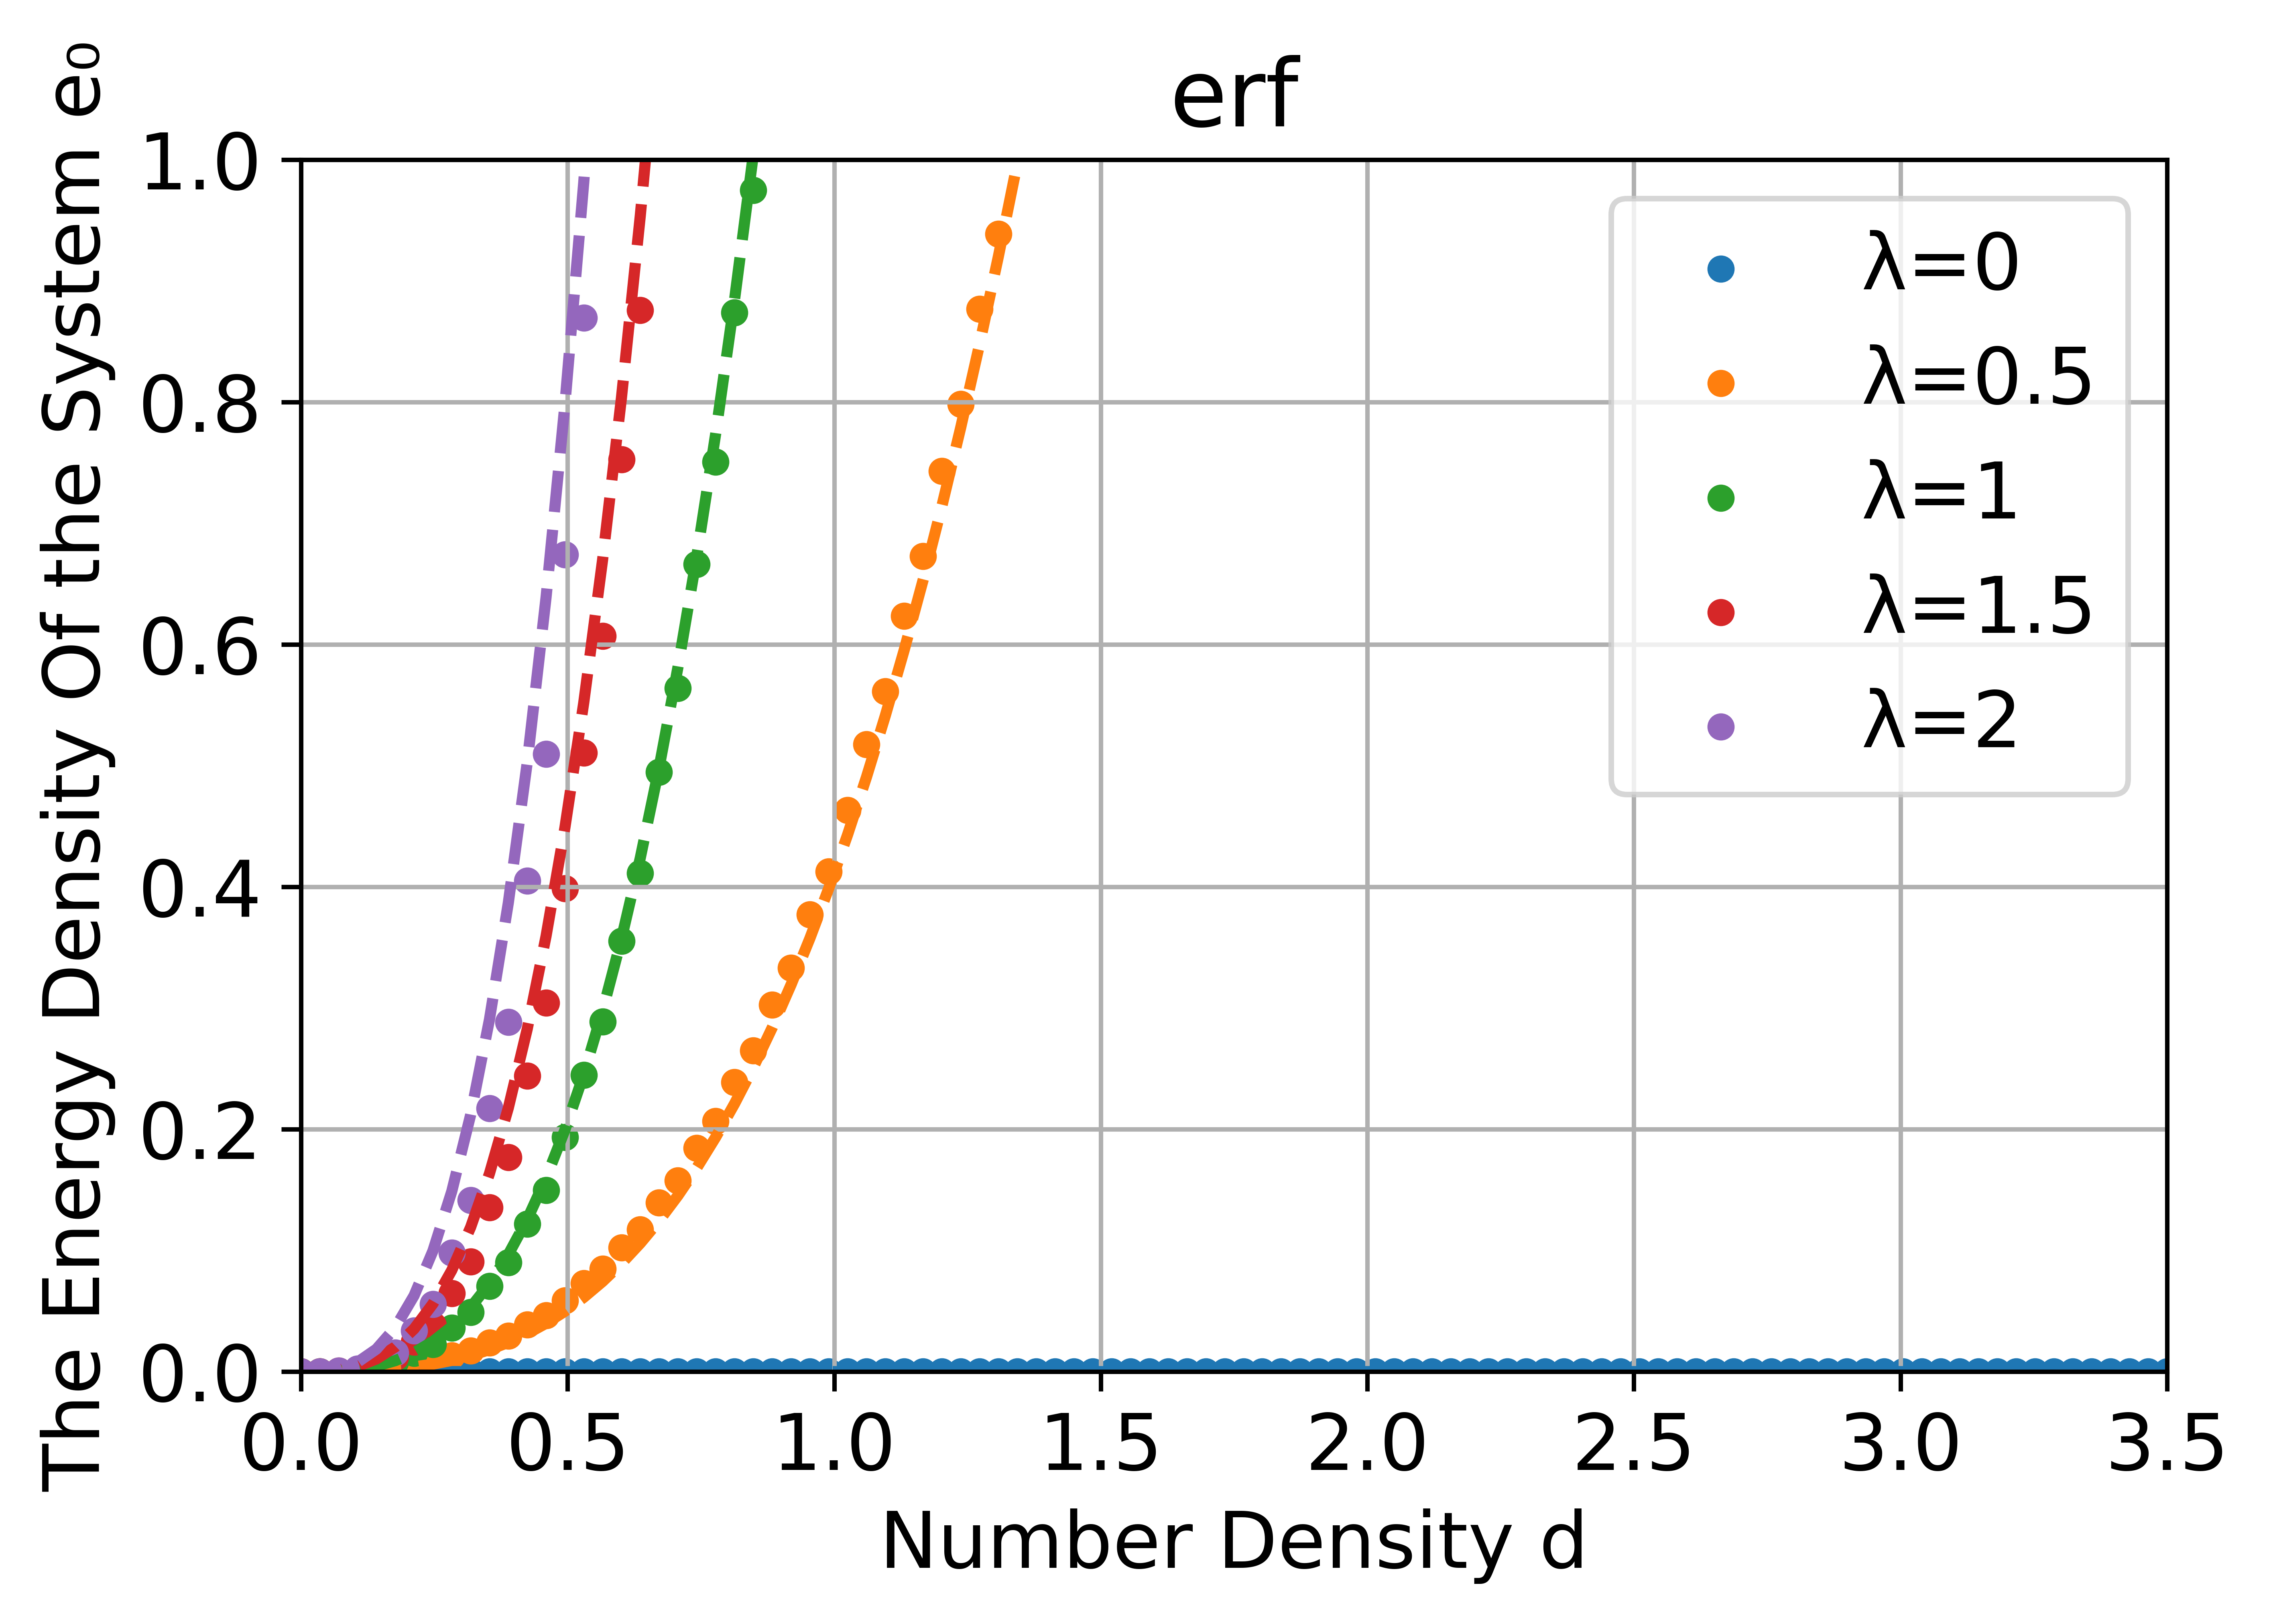

In [9]:
plt.figure(dpi=1000)
plt.xlabel('Number Density d')
plt.ylabel('The Energy Density Of the System e₀')
plt.title('erf')

for i in range(np.size(λs)):
    plt.scatter(densities, e0[i], label = "λ=%g"%λs[i], s = 15)
    
for i in range(np.size(λs)):
    λ = λs[i]
    plt.plot(densities, solution(densities), linewidth = 2, linestyle = 'dashed')
    

plt.grid()
plt.legend()
plt.xlim(0, 3.5)
plt.ylim(0,1)
plt.show()

log(e0) vs log(d)

<ipython-input-10-bec782f61824>:7: RuntimeWarning: divide by zero encountered in log
  loge0 = np.log(newe0)
<ipython-input-10-bec782f61824>:8: RuntimeWarning: divide by zero encountered in log
  logd = np.log(densities)


Slope =  2.9857209704604752
Intercept =  -0.8696799020674697
Slope =  3.0044235991052677
Intercept =  0.48787773500941434
Slope =  3.0109787163377333
Intercept =  1.288800213856835
Slope =  3.0143367751025703
Intercept =  1.8590527308584748


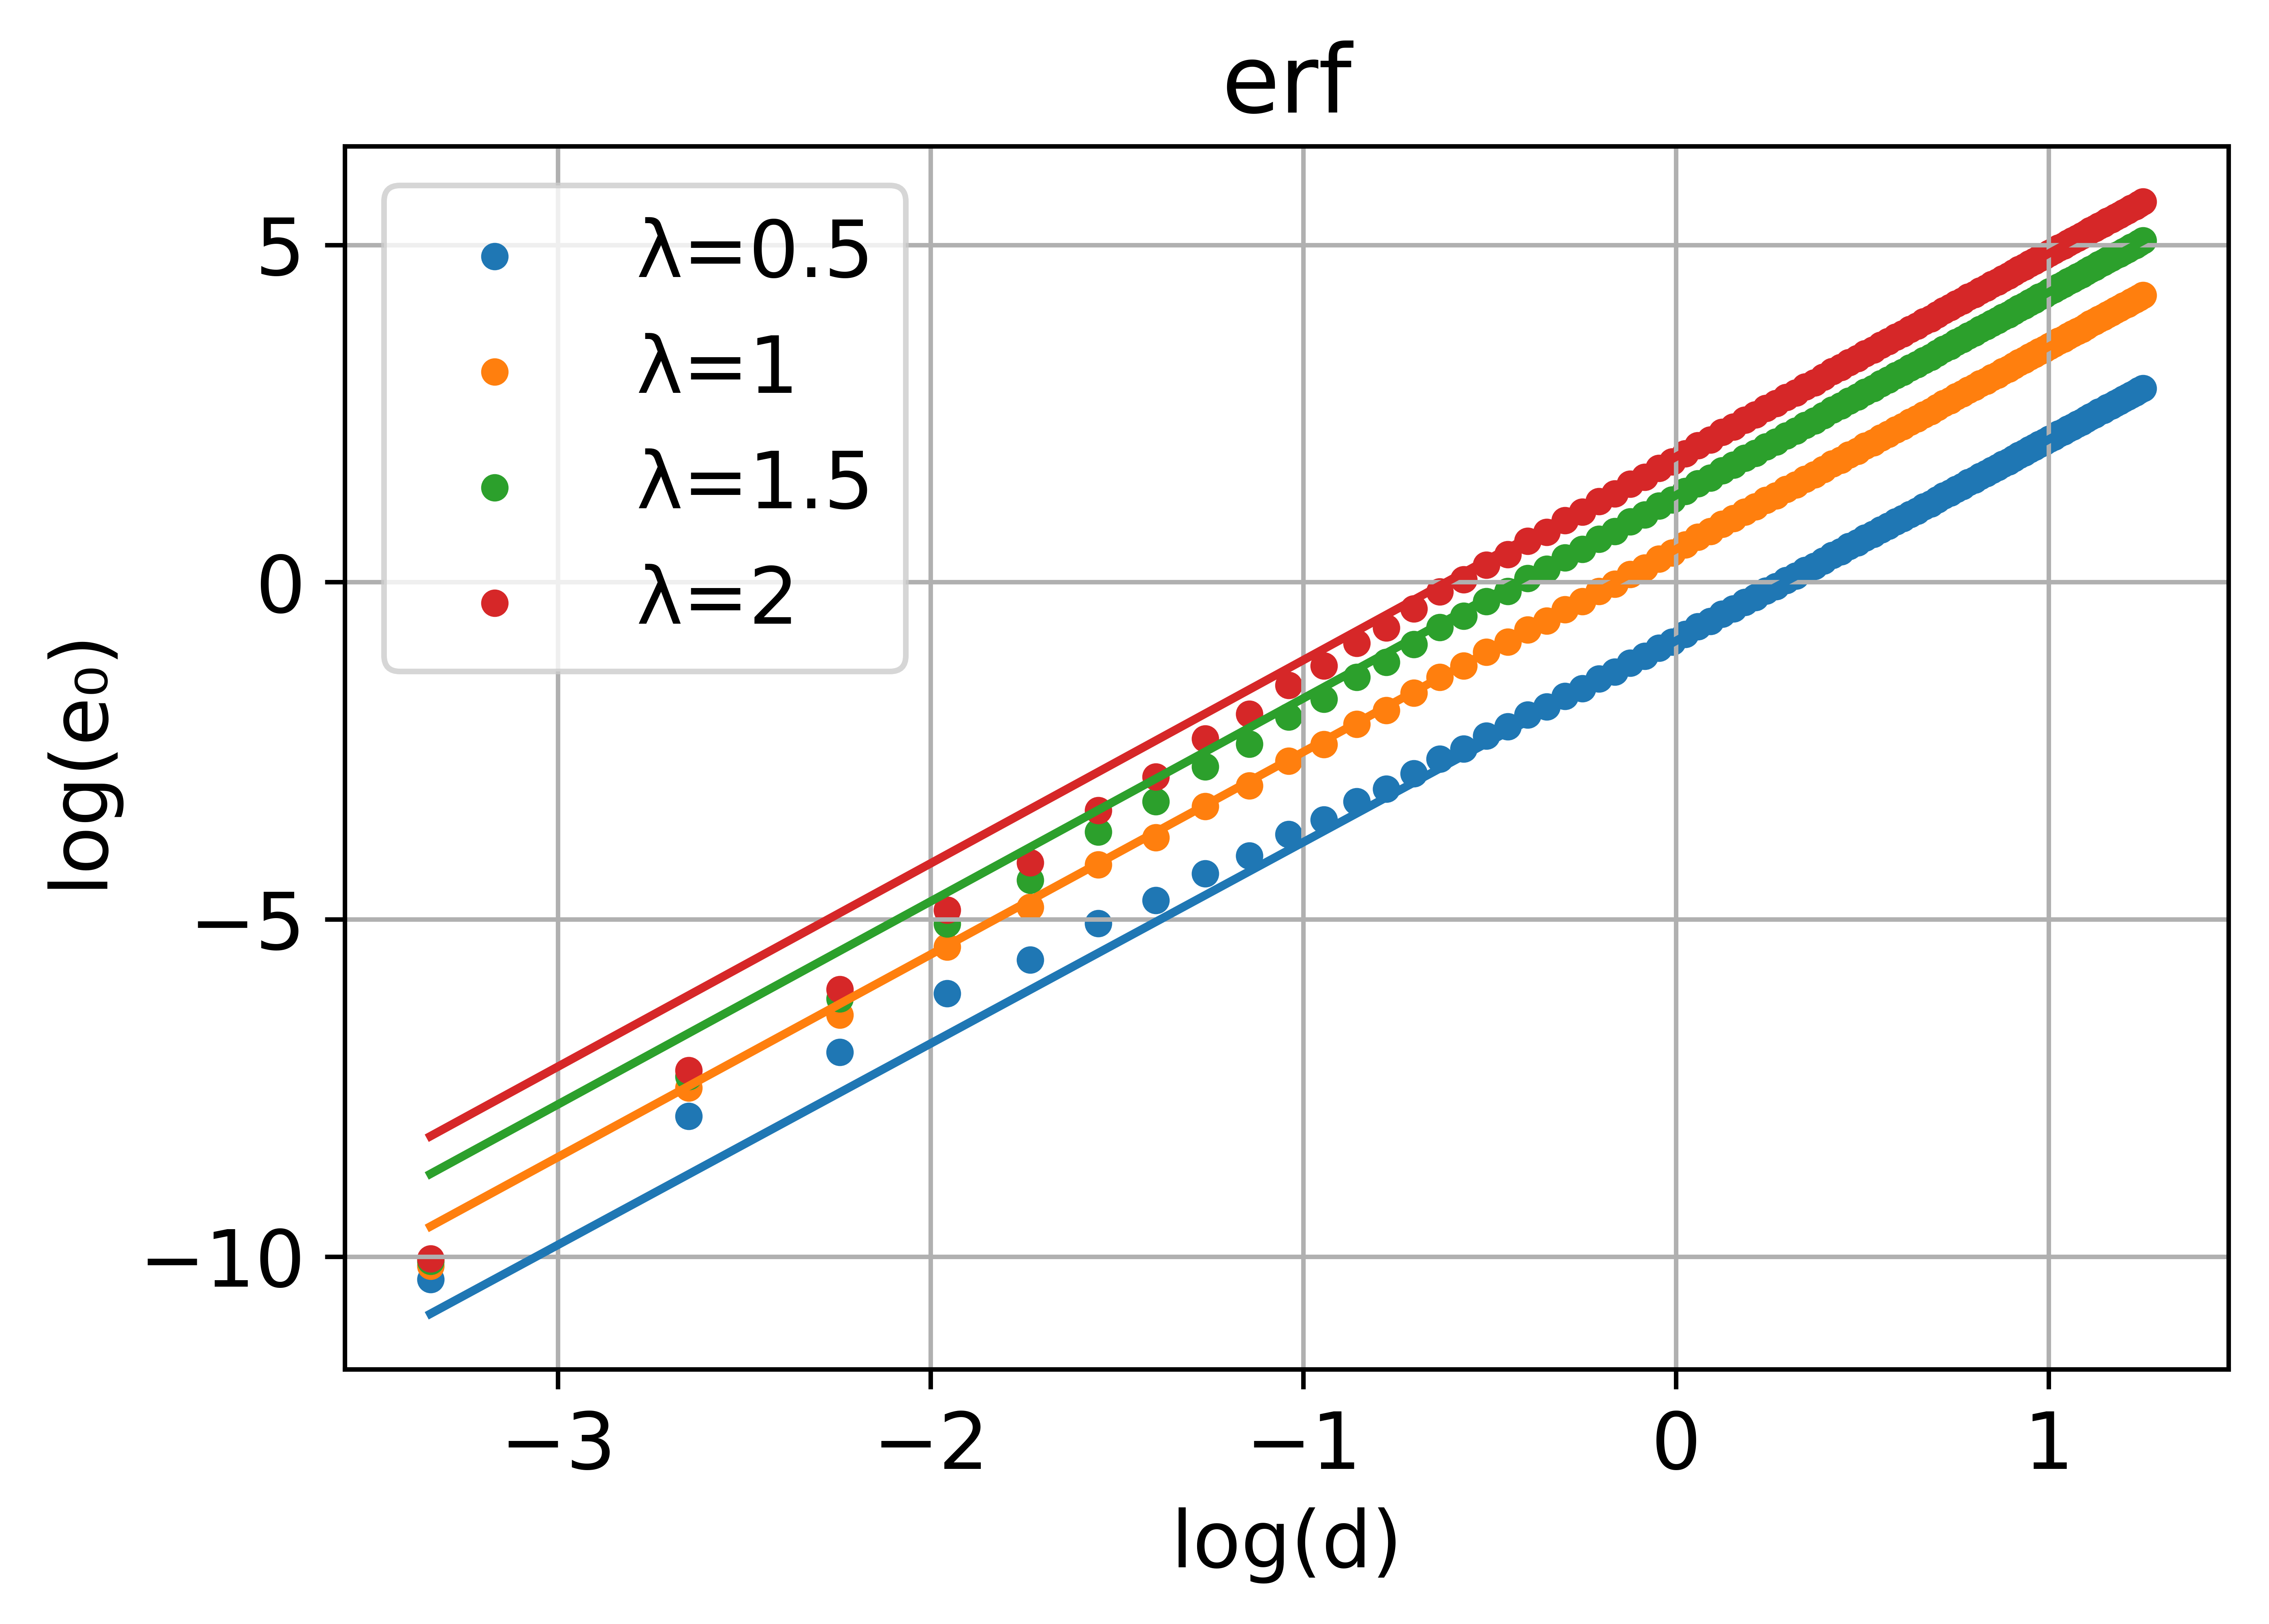

In [10]:
plt.figure(dpi=1000)
plt.xlabel('log(d)')
plt.ylabel('log(e₀)')
plt.title('erf')

newe0 = e0[1:]
loge0 = np.log(newe0)
logd = np.log(densities)

datapoints = 60

for i in range(np.size(λs)-1):
    plt.scatter(logd, loge0[i], label = "λ=%g"%λs[i+1], s = 15)
    slope = stats.linregress(logd[datapoints:],loge0[i][datapoints:])[0]
    intercept = stats.linregress(logd[datapoints:],loge0[i][datapoints:])[1]
    print("Slope = ",slope)
    print("Intercept = ", intercept)
    plt.plot(logd, intercept+slope*logd)
    
for i in range(np.size(λs)-1):
    λ = λs[i+1]
    #plt.plot(logd, np.log(solution(densities)), linewidth = 2, linestyle = 'dashed')


plt.grid()
plt.legend()
plt.show()

Energy difference

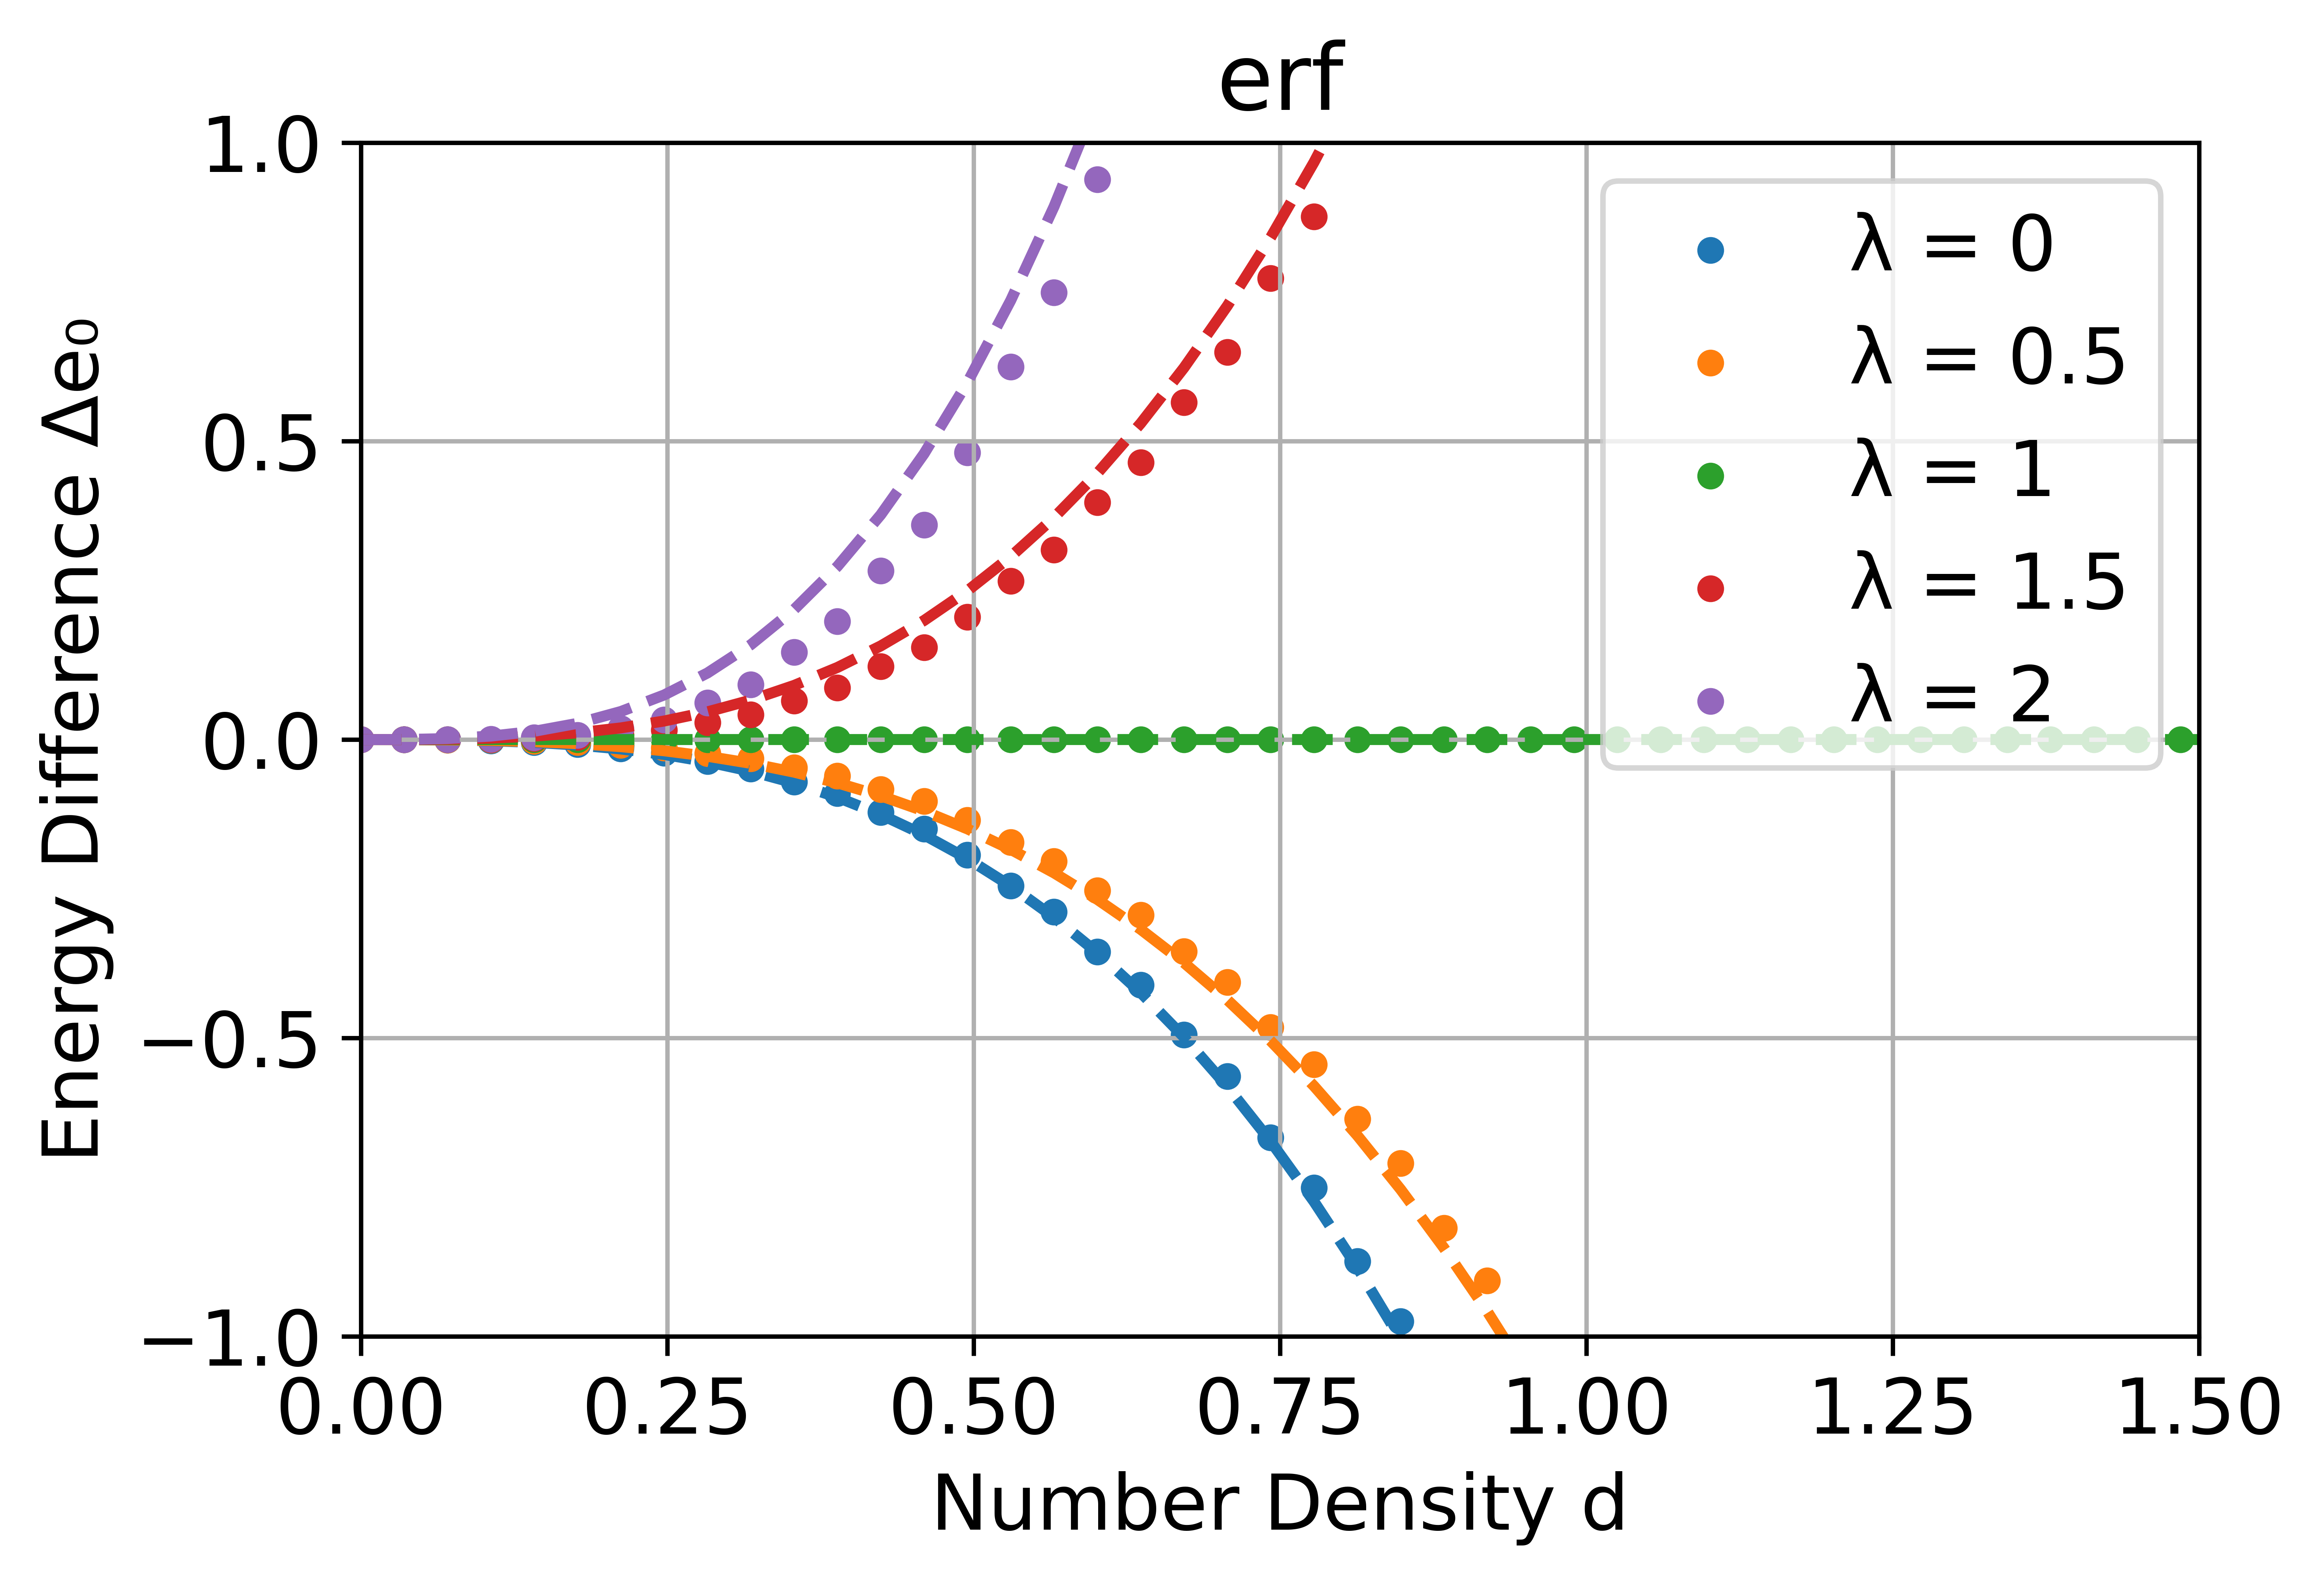

In [11]:
lambda1Index = np.where(λs==1)[0][0]
deltaEnergy = []
for i in range(np.size(λs)):
    deltaEnergy.append(e0[i]-e0[lambda1Index])

λ = λs[lambda1Index]    
nonIntEner = solution(densities)
#print(deltaEnergy)
plt.figure(dpi=1000)
plt.xlabel('Number Density d')
plt.ylabel('Energy Difference Δe₀')
plt.title('erf')

for i in range(np.size(λs)):
    λ = λs[i]
    plt.scatter(densities, deltaEnergy[i], label = 'λ = %g'%λs[i], s = 15)
    plt.plot(densities, solution(densities)-nonIntEner, linewidth = 2, linestyle = 'dashed')
    
plt.xlim(0, 1.5)
plt.ylim(-1, 1)
plt.grid()
plt.legend()
plt.show()

Plotting lambda vs k

53


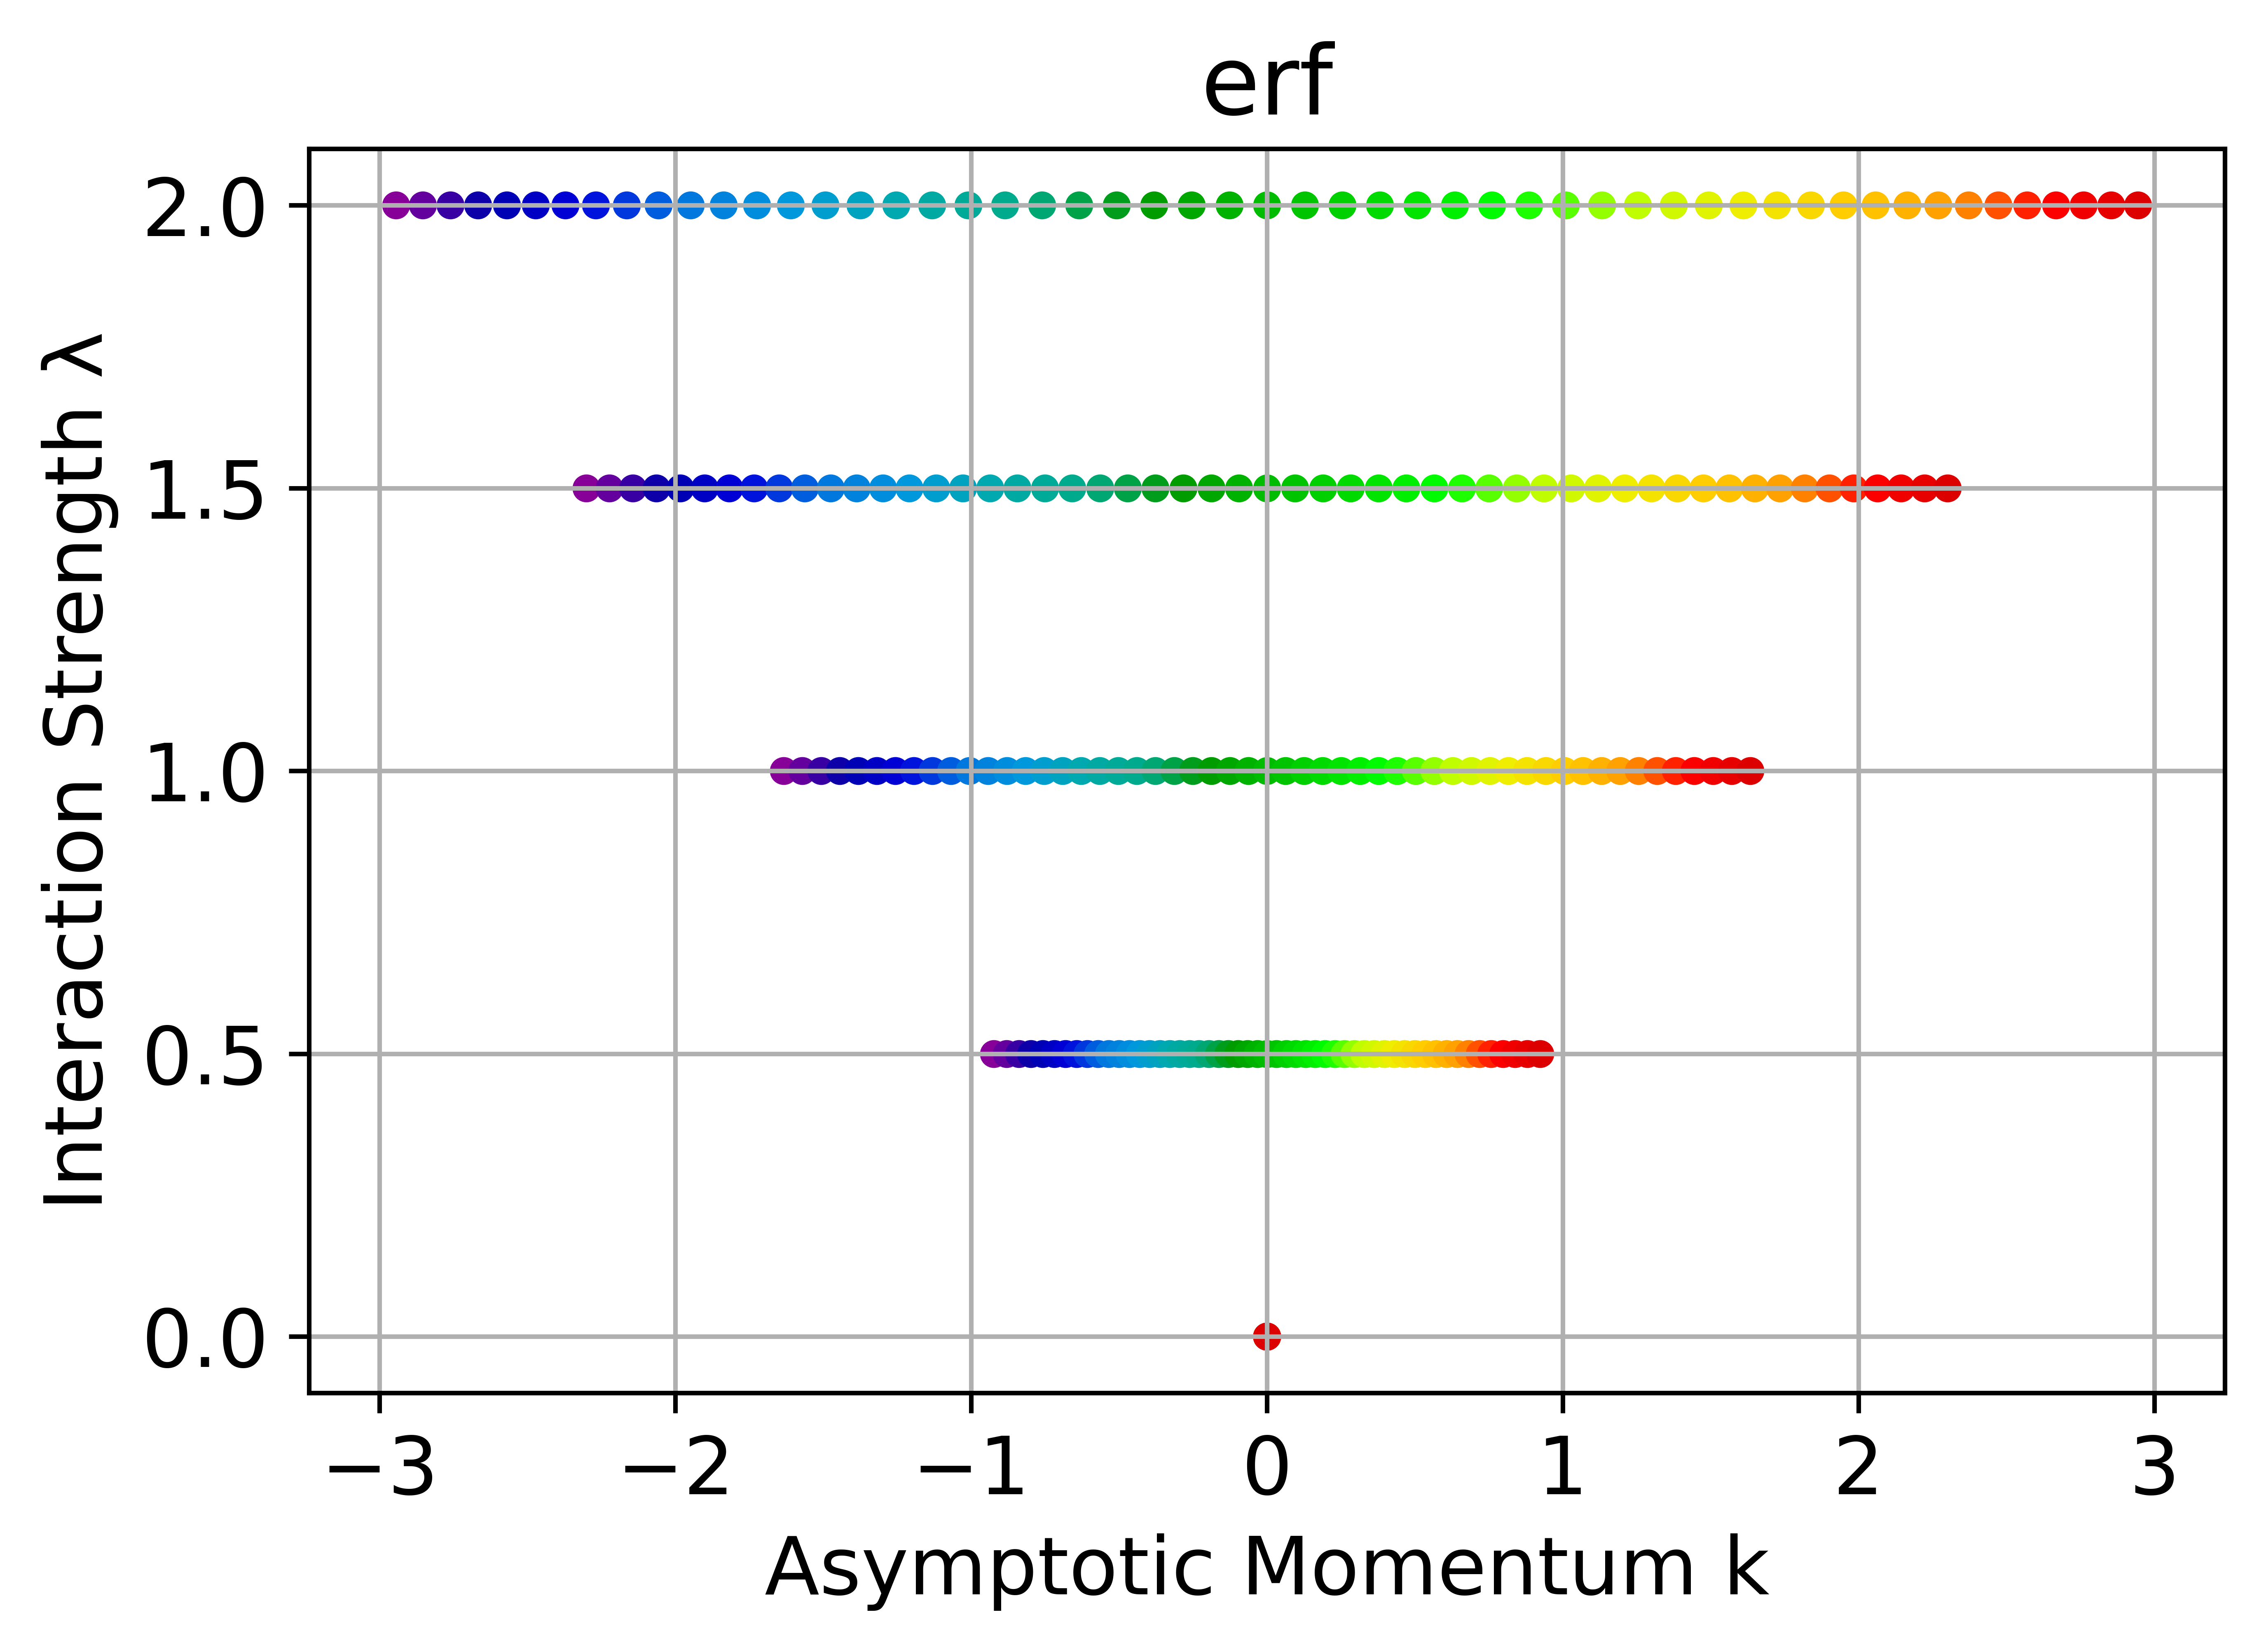

In [12]:
plt.figure(dpi=1000)
plt.yticks(λs)
plt.xlabel('Asymptotic Momentum k')
plt.ylabel('Interaction Strength λ')
plt.title('erf')
numberOfParticles = int ((densities*boxSize)[15])
print(numberOfParticles)

colourmap = plt.cm.nipy_spectral
colours = colourmap(np.linspace(0.1, 0.9, numberOfParticles))

ksplot = np.array(np.transpose(ks), dtype = "object")
plotting = np.zeros((np.size(λs), numberOfParticles))

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
for i in range(np.size(λs)):
    plotting[i] = ksplot[15][i]

for i in range(int(np.size(plotting)/np.size(λs))):
     plt.scatter(plotting[:, i], λs, color = colours[i], marker = "o", s=15)
    # plt.plot(plotting[:, i], λs, color = colours[i], marker = "o", ms=3)
    
plt.grid()
plt.show()



Density of momentum states ρ(k) plots

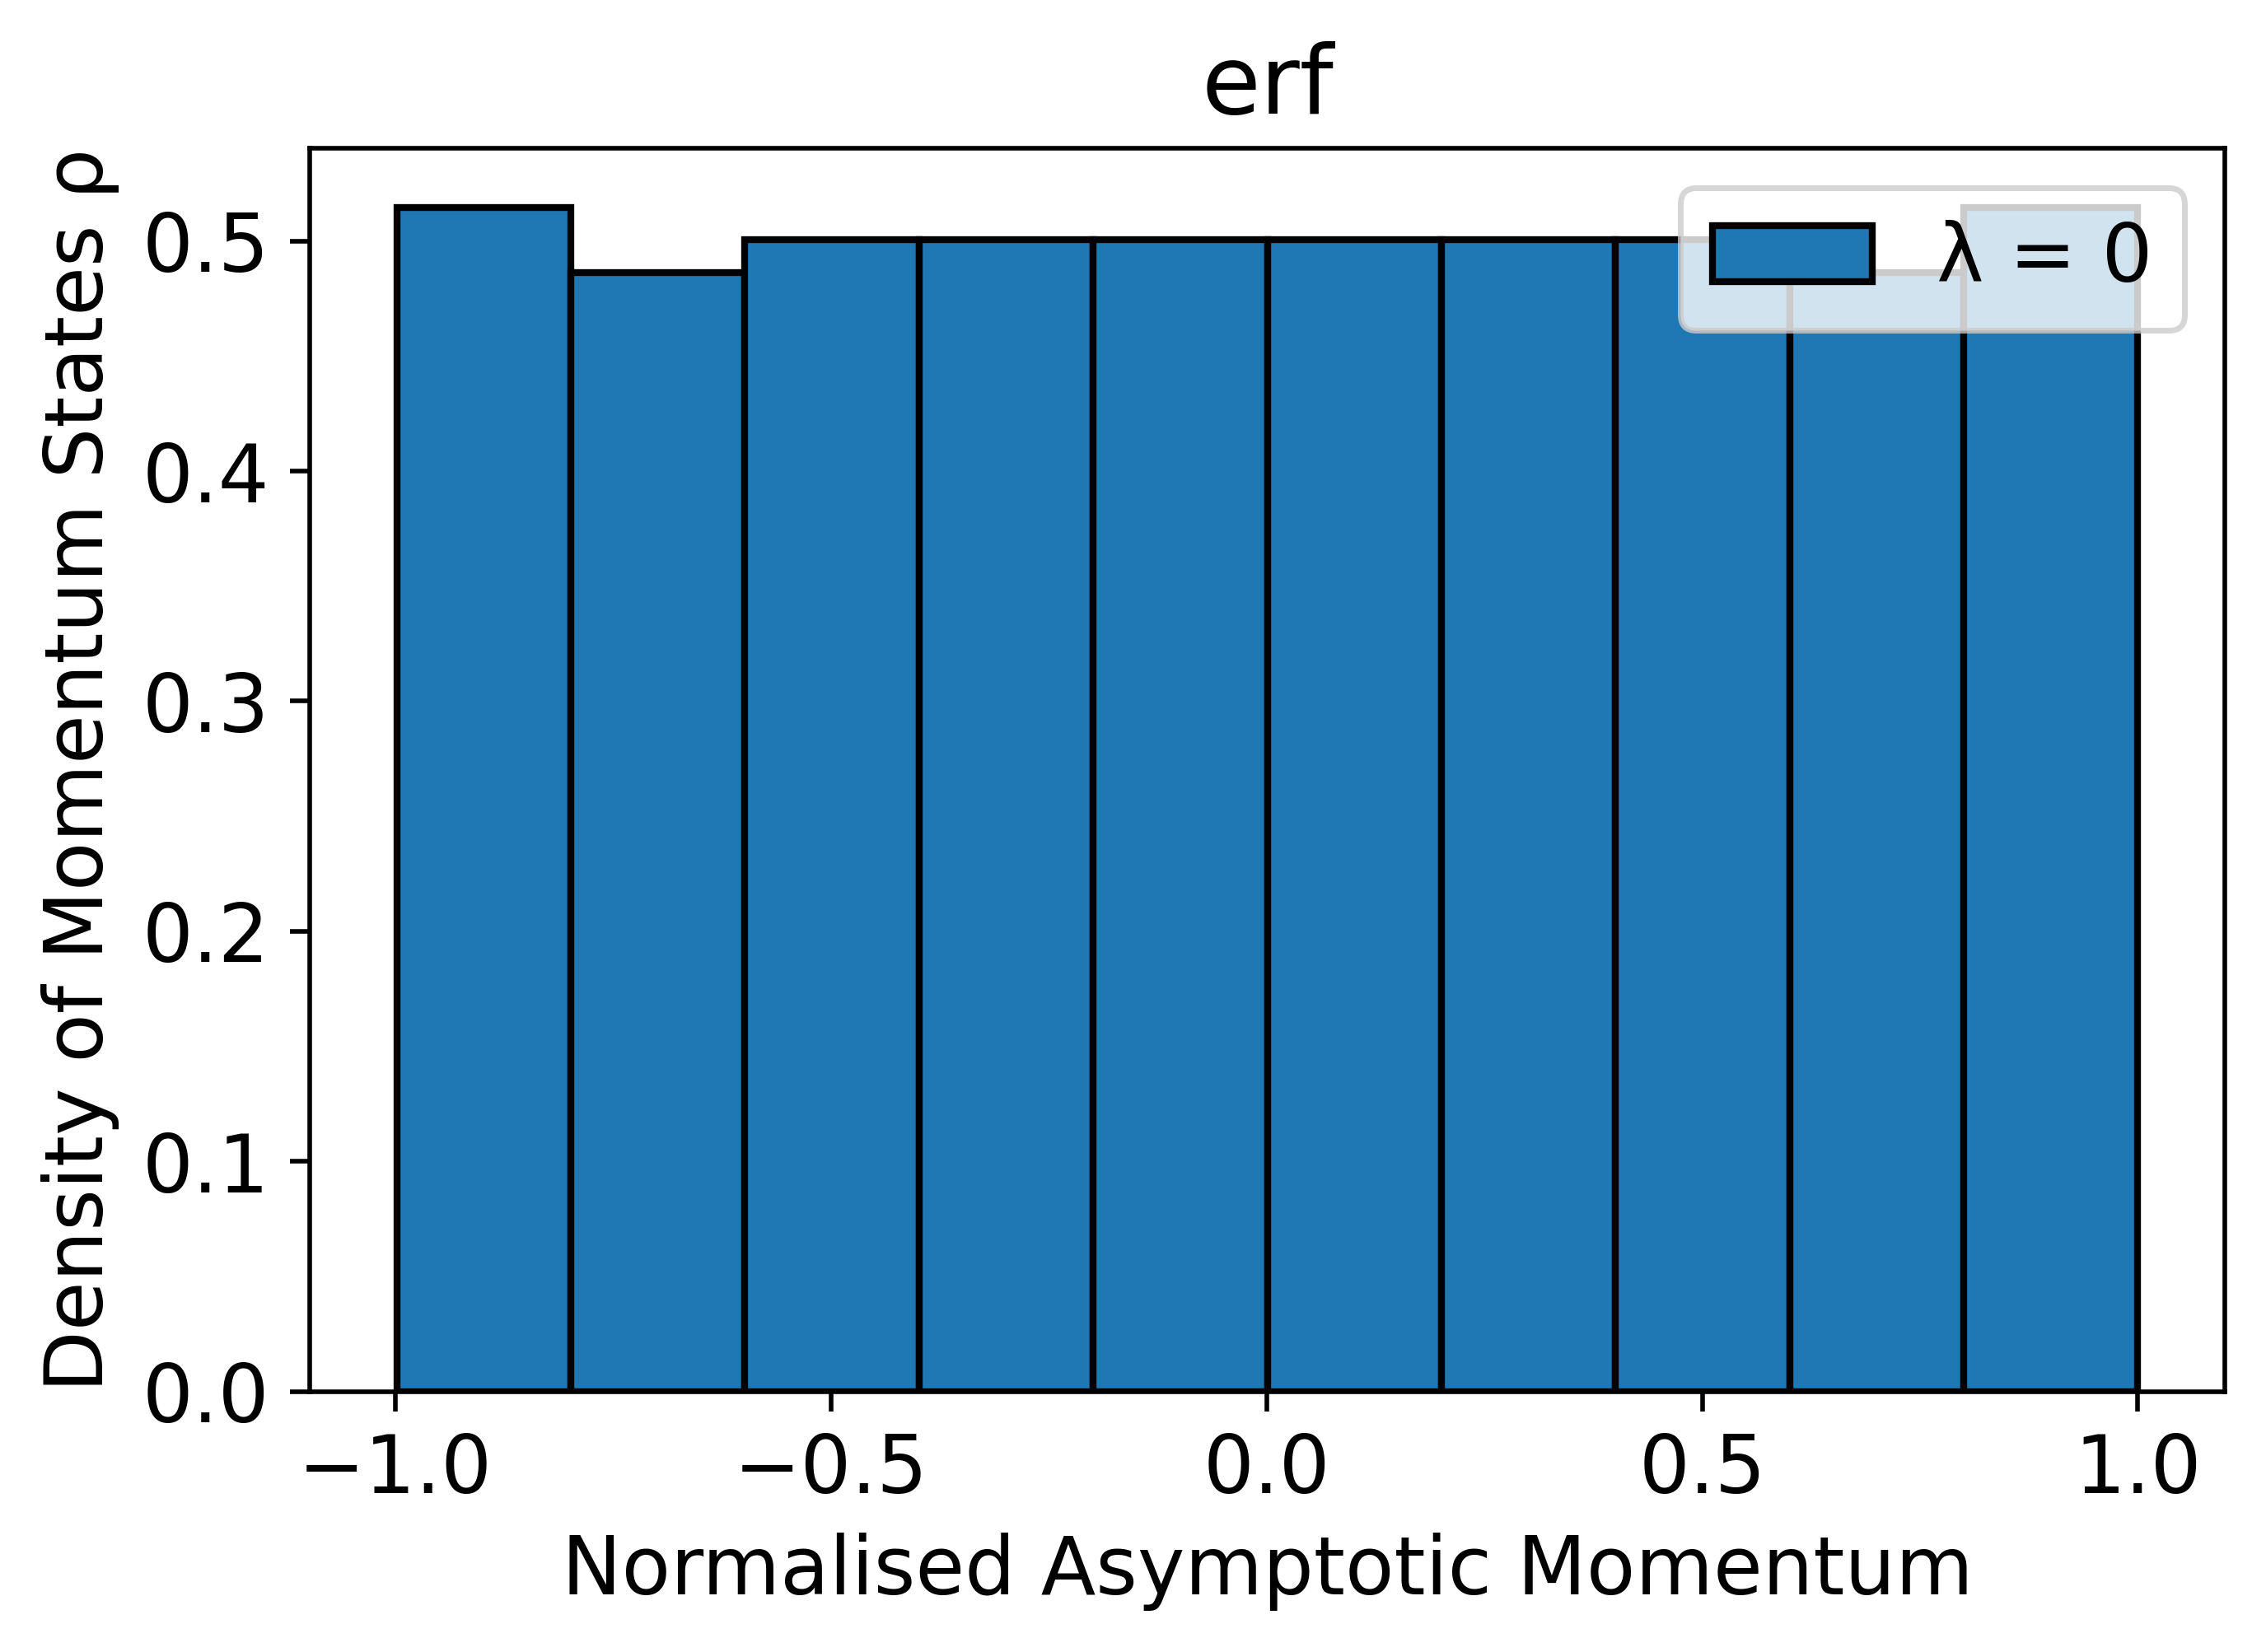

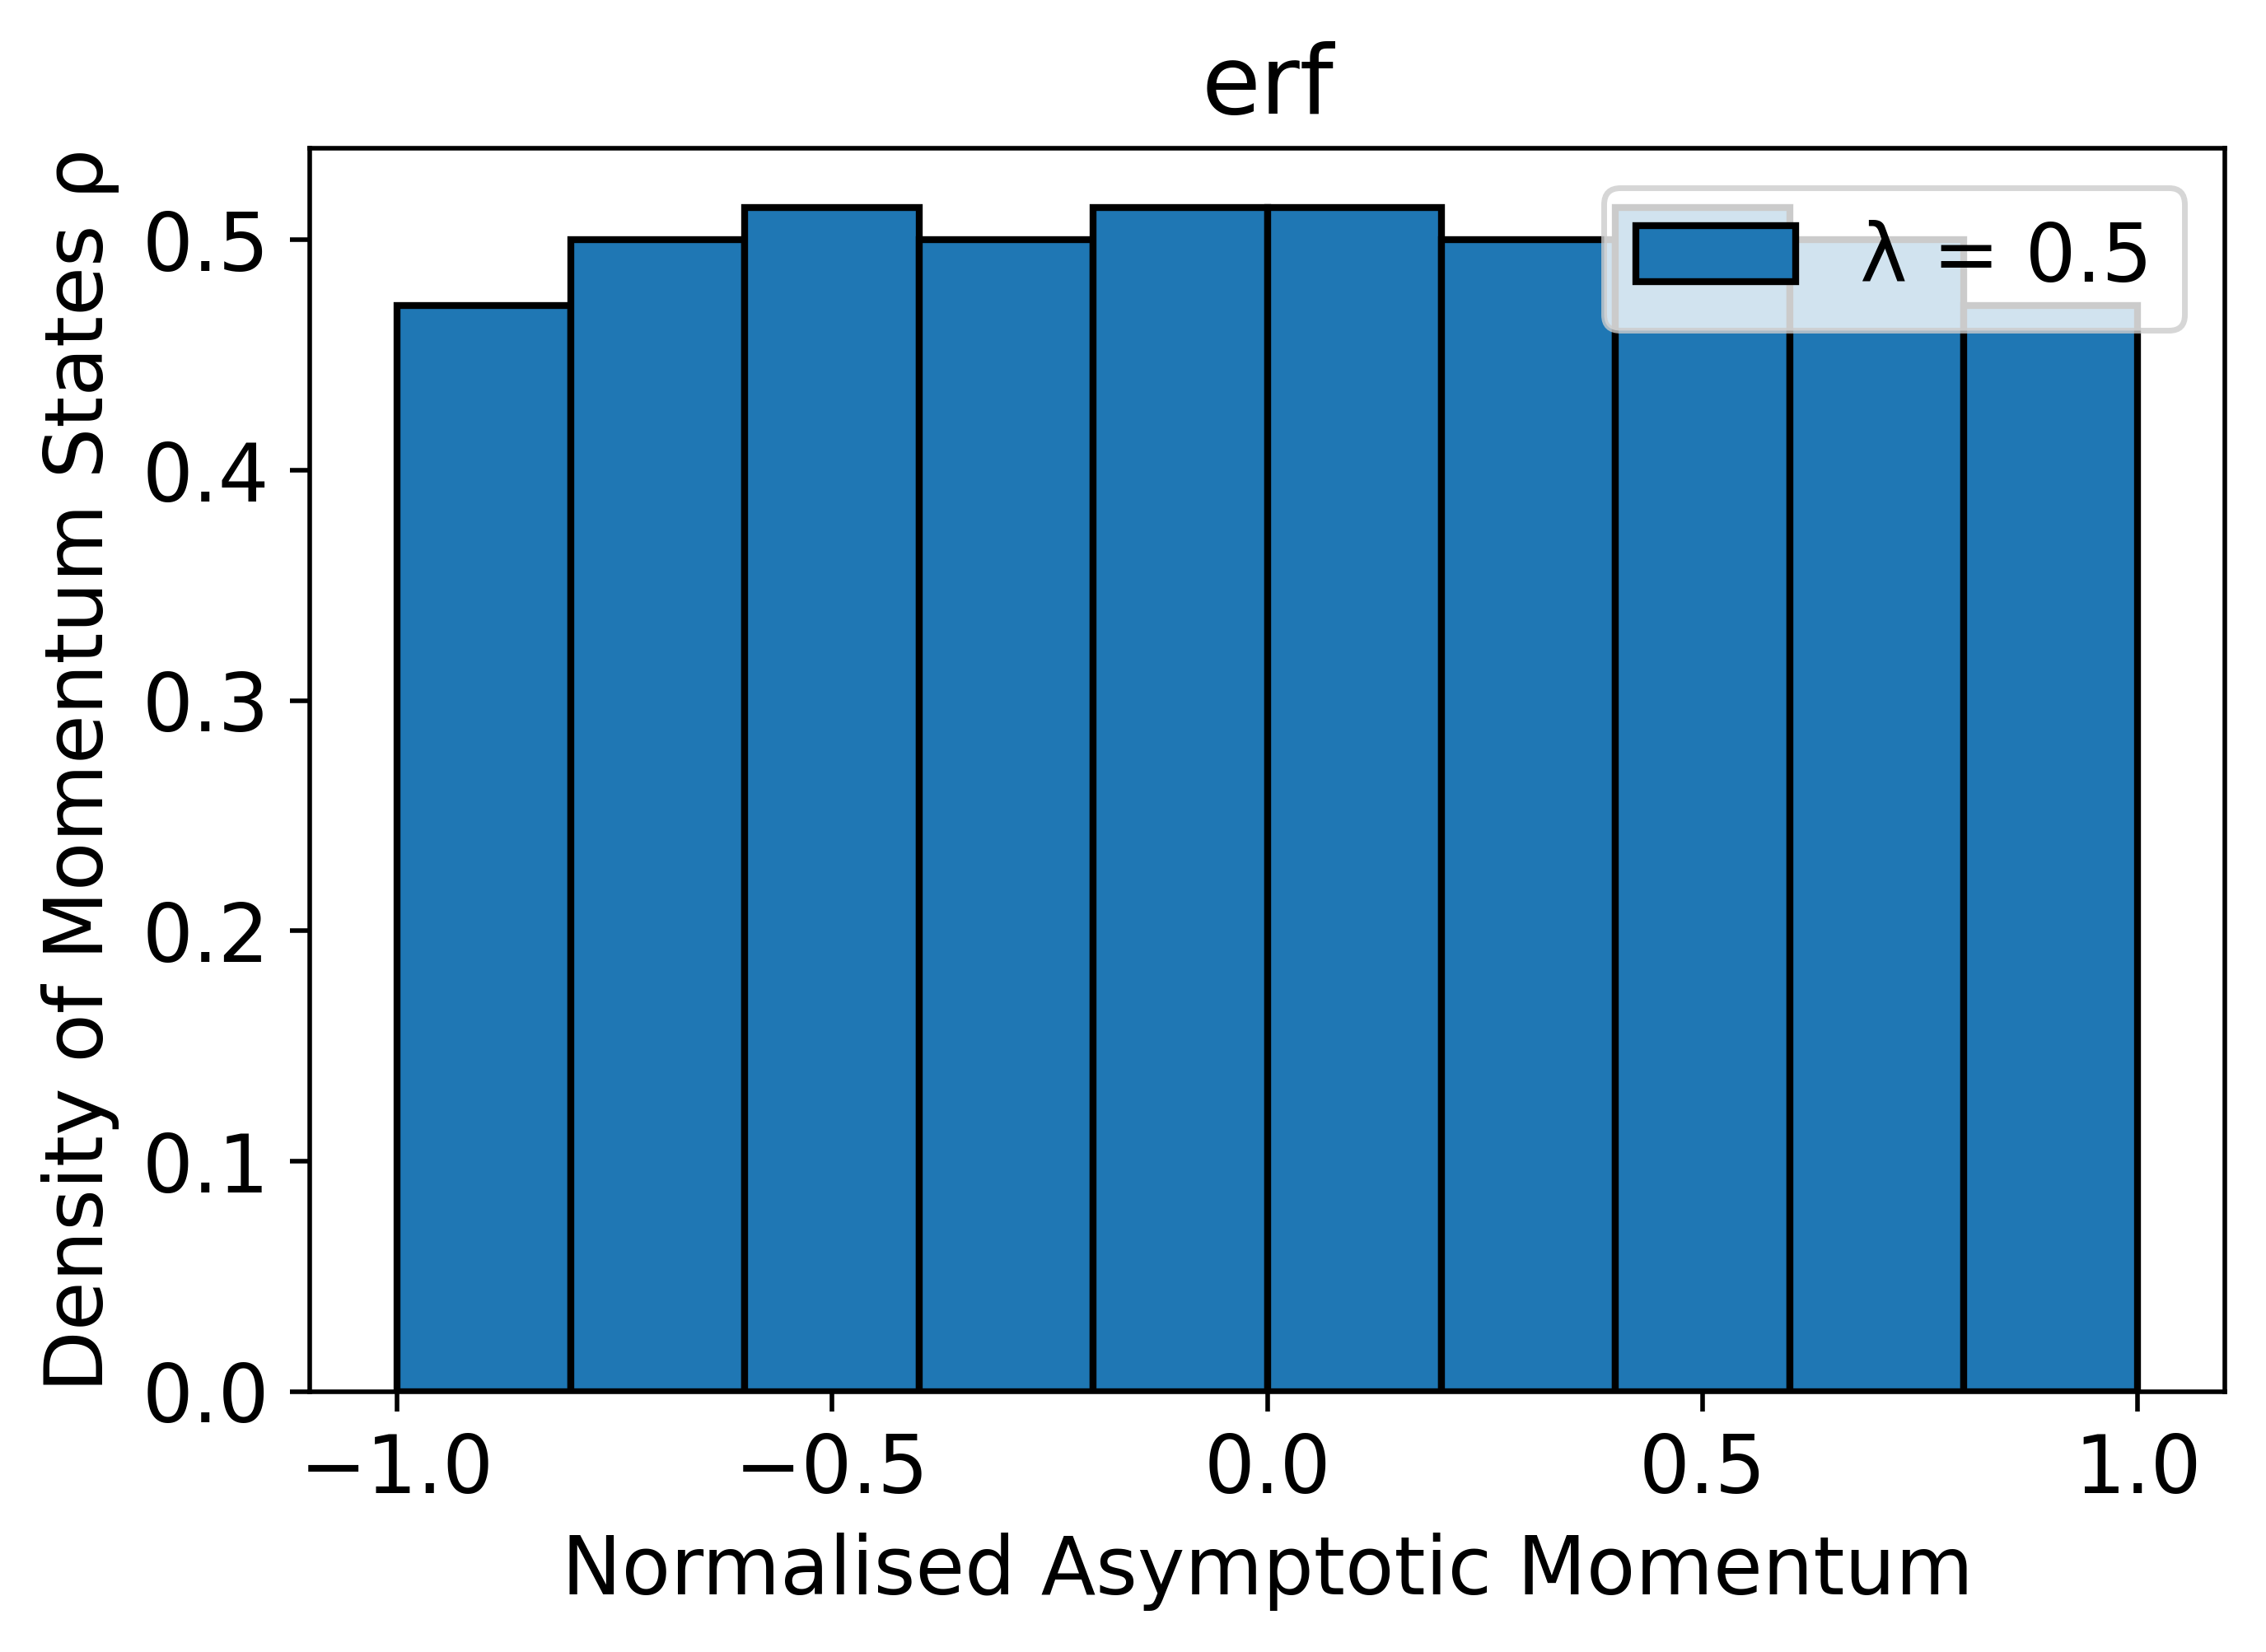

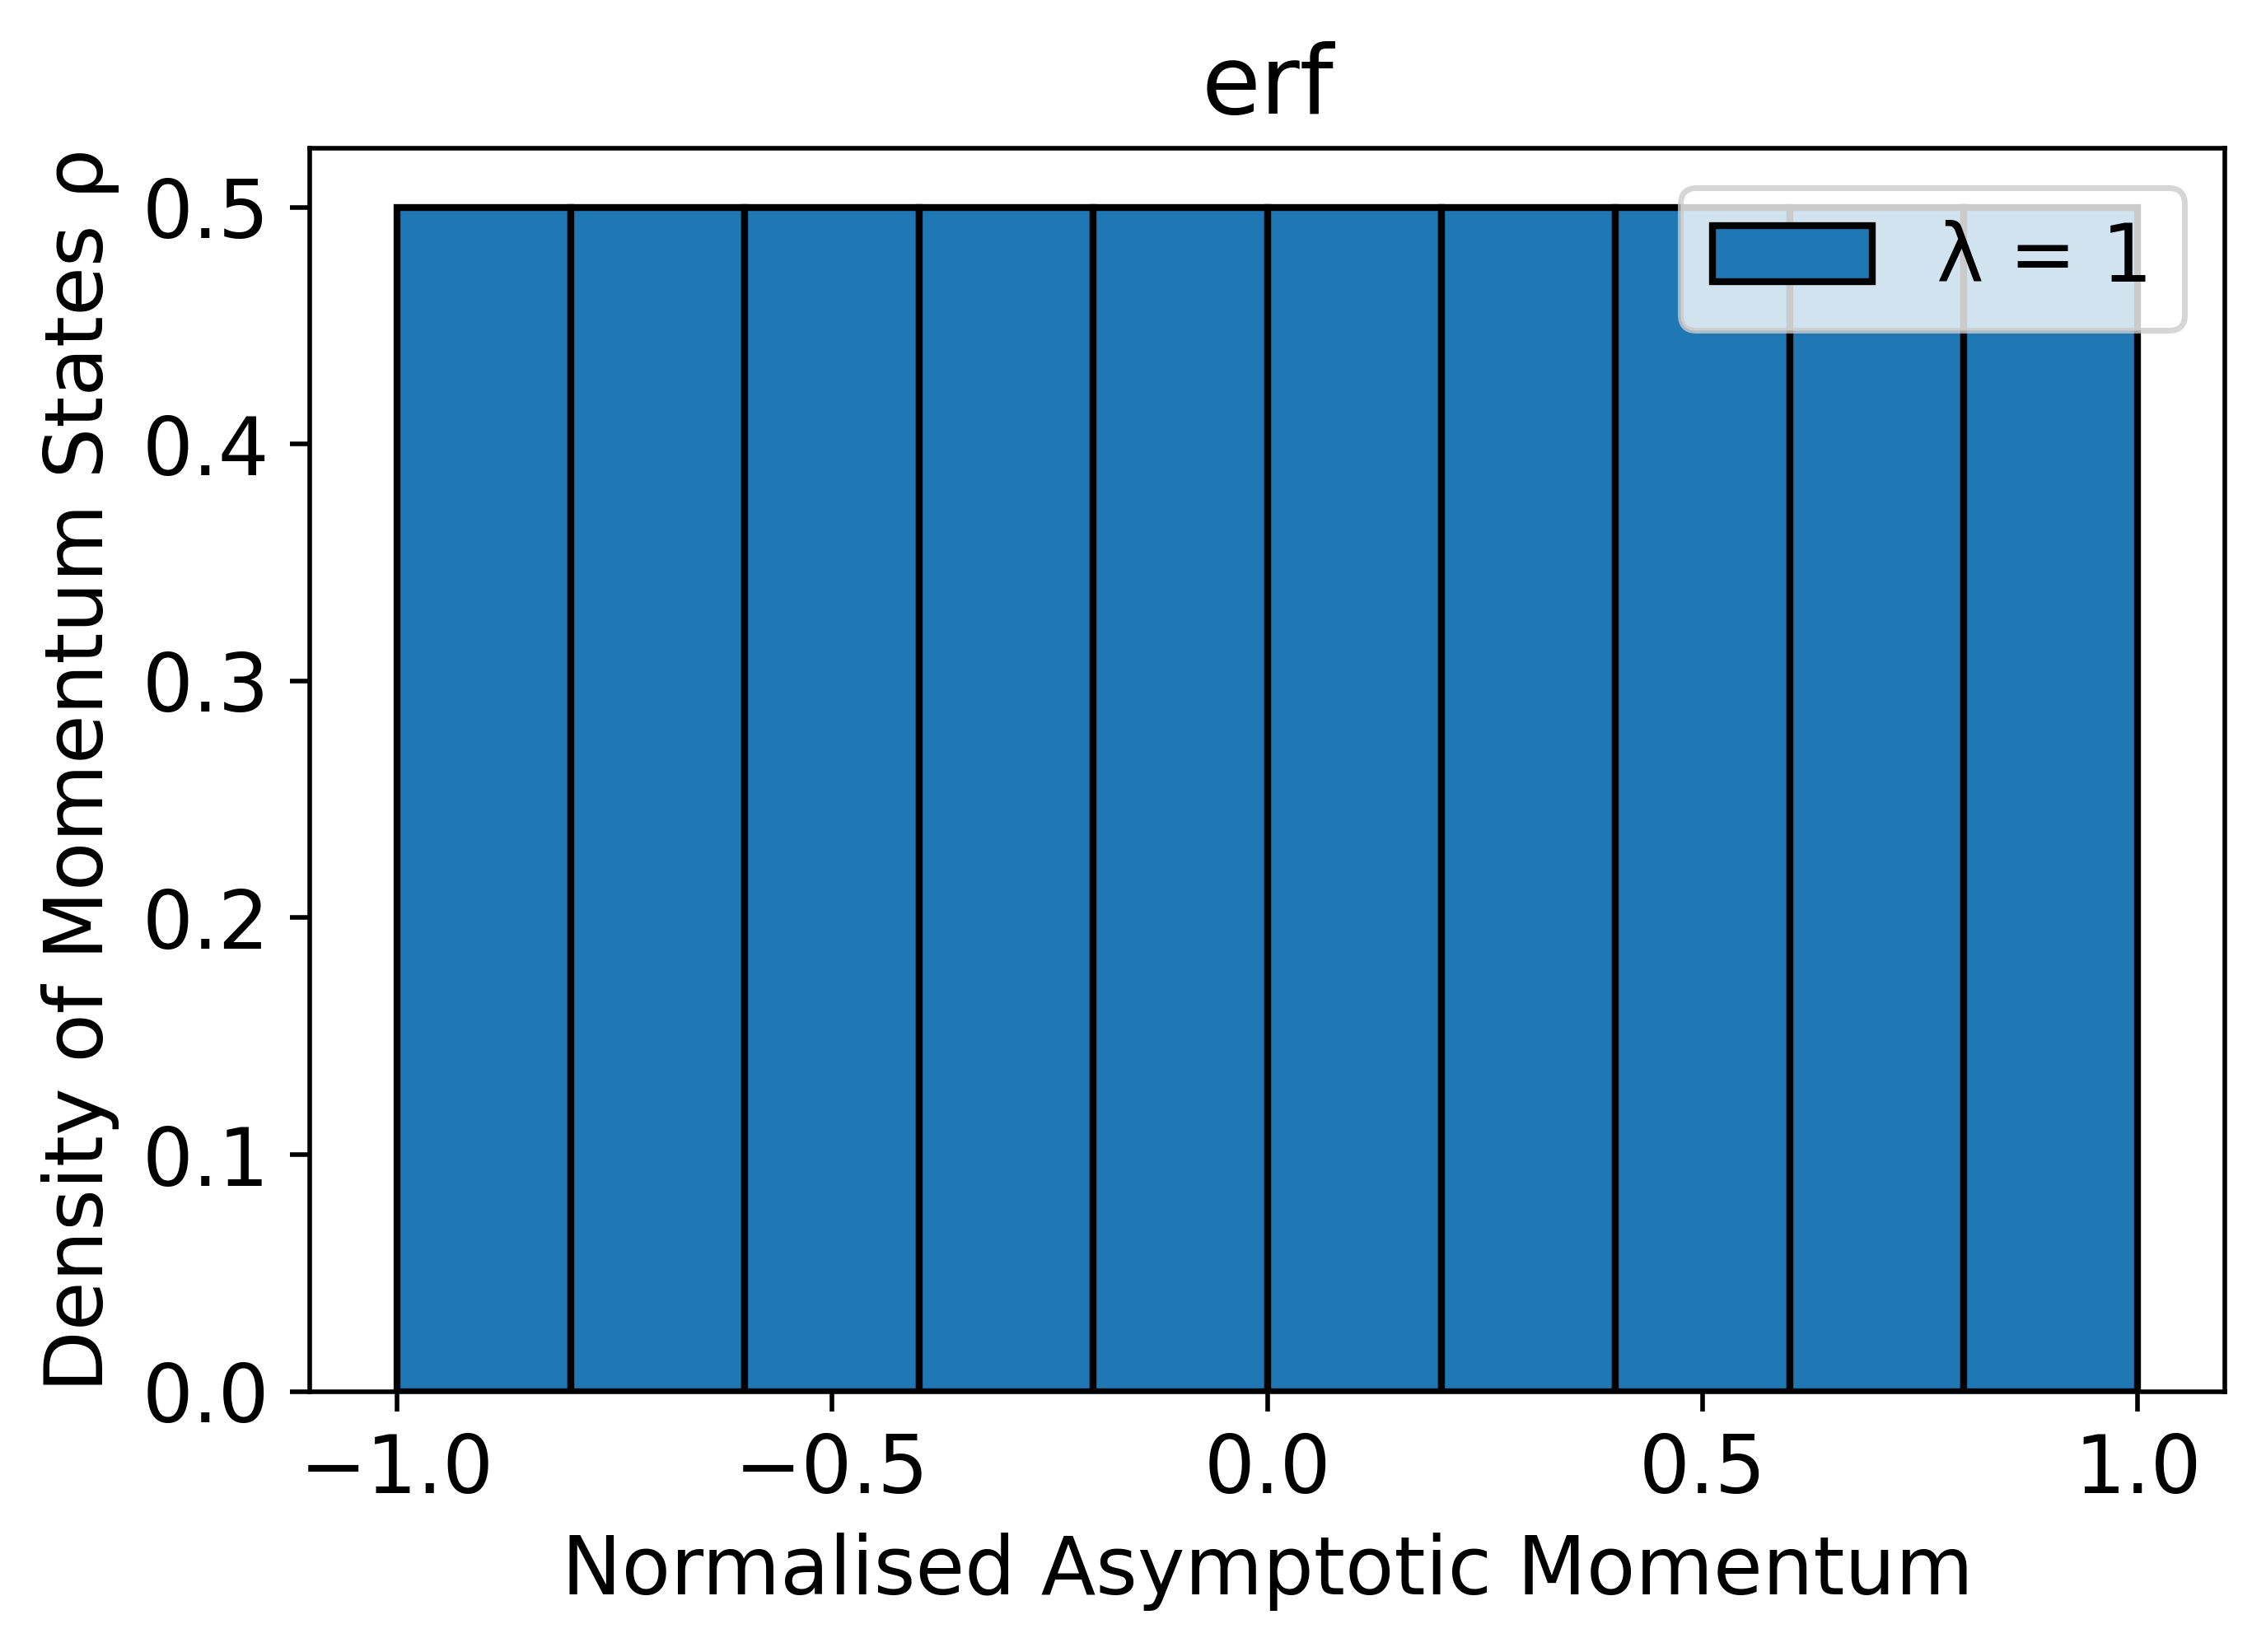

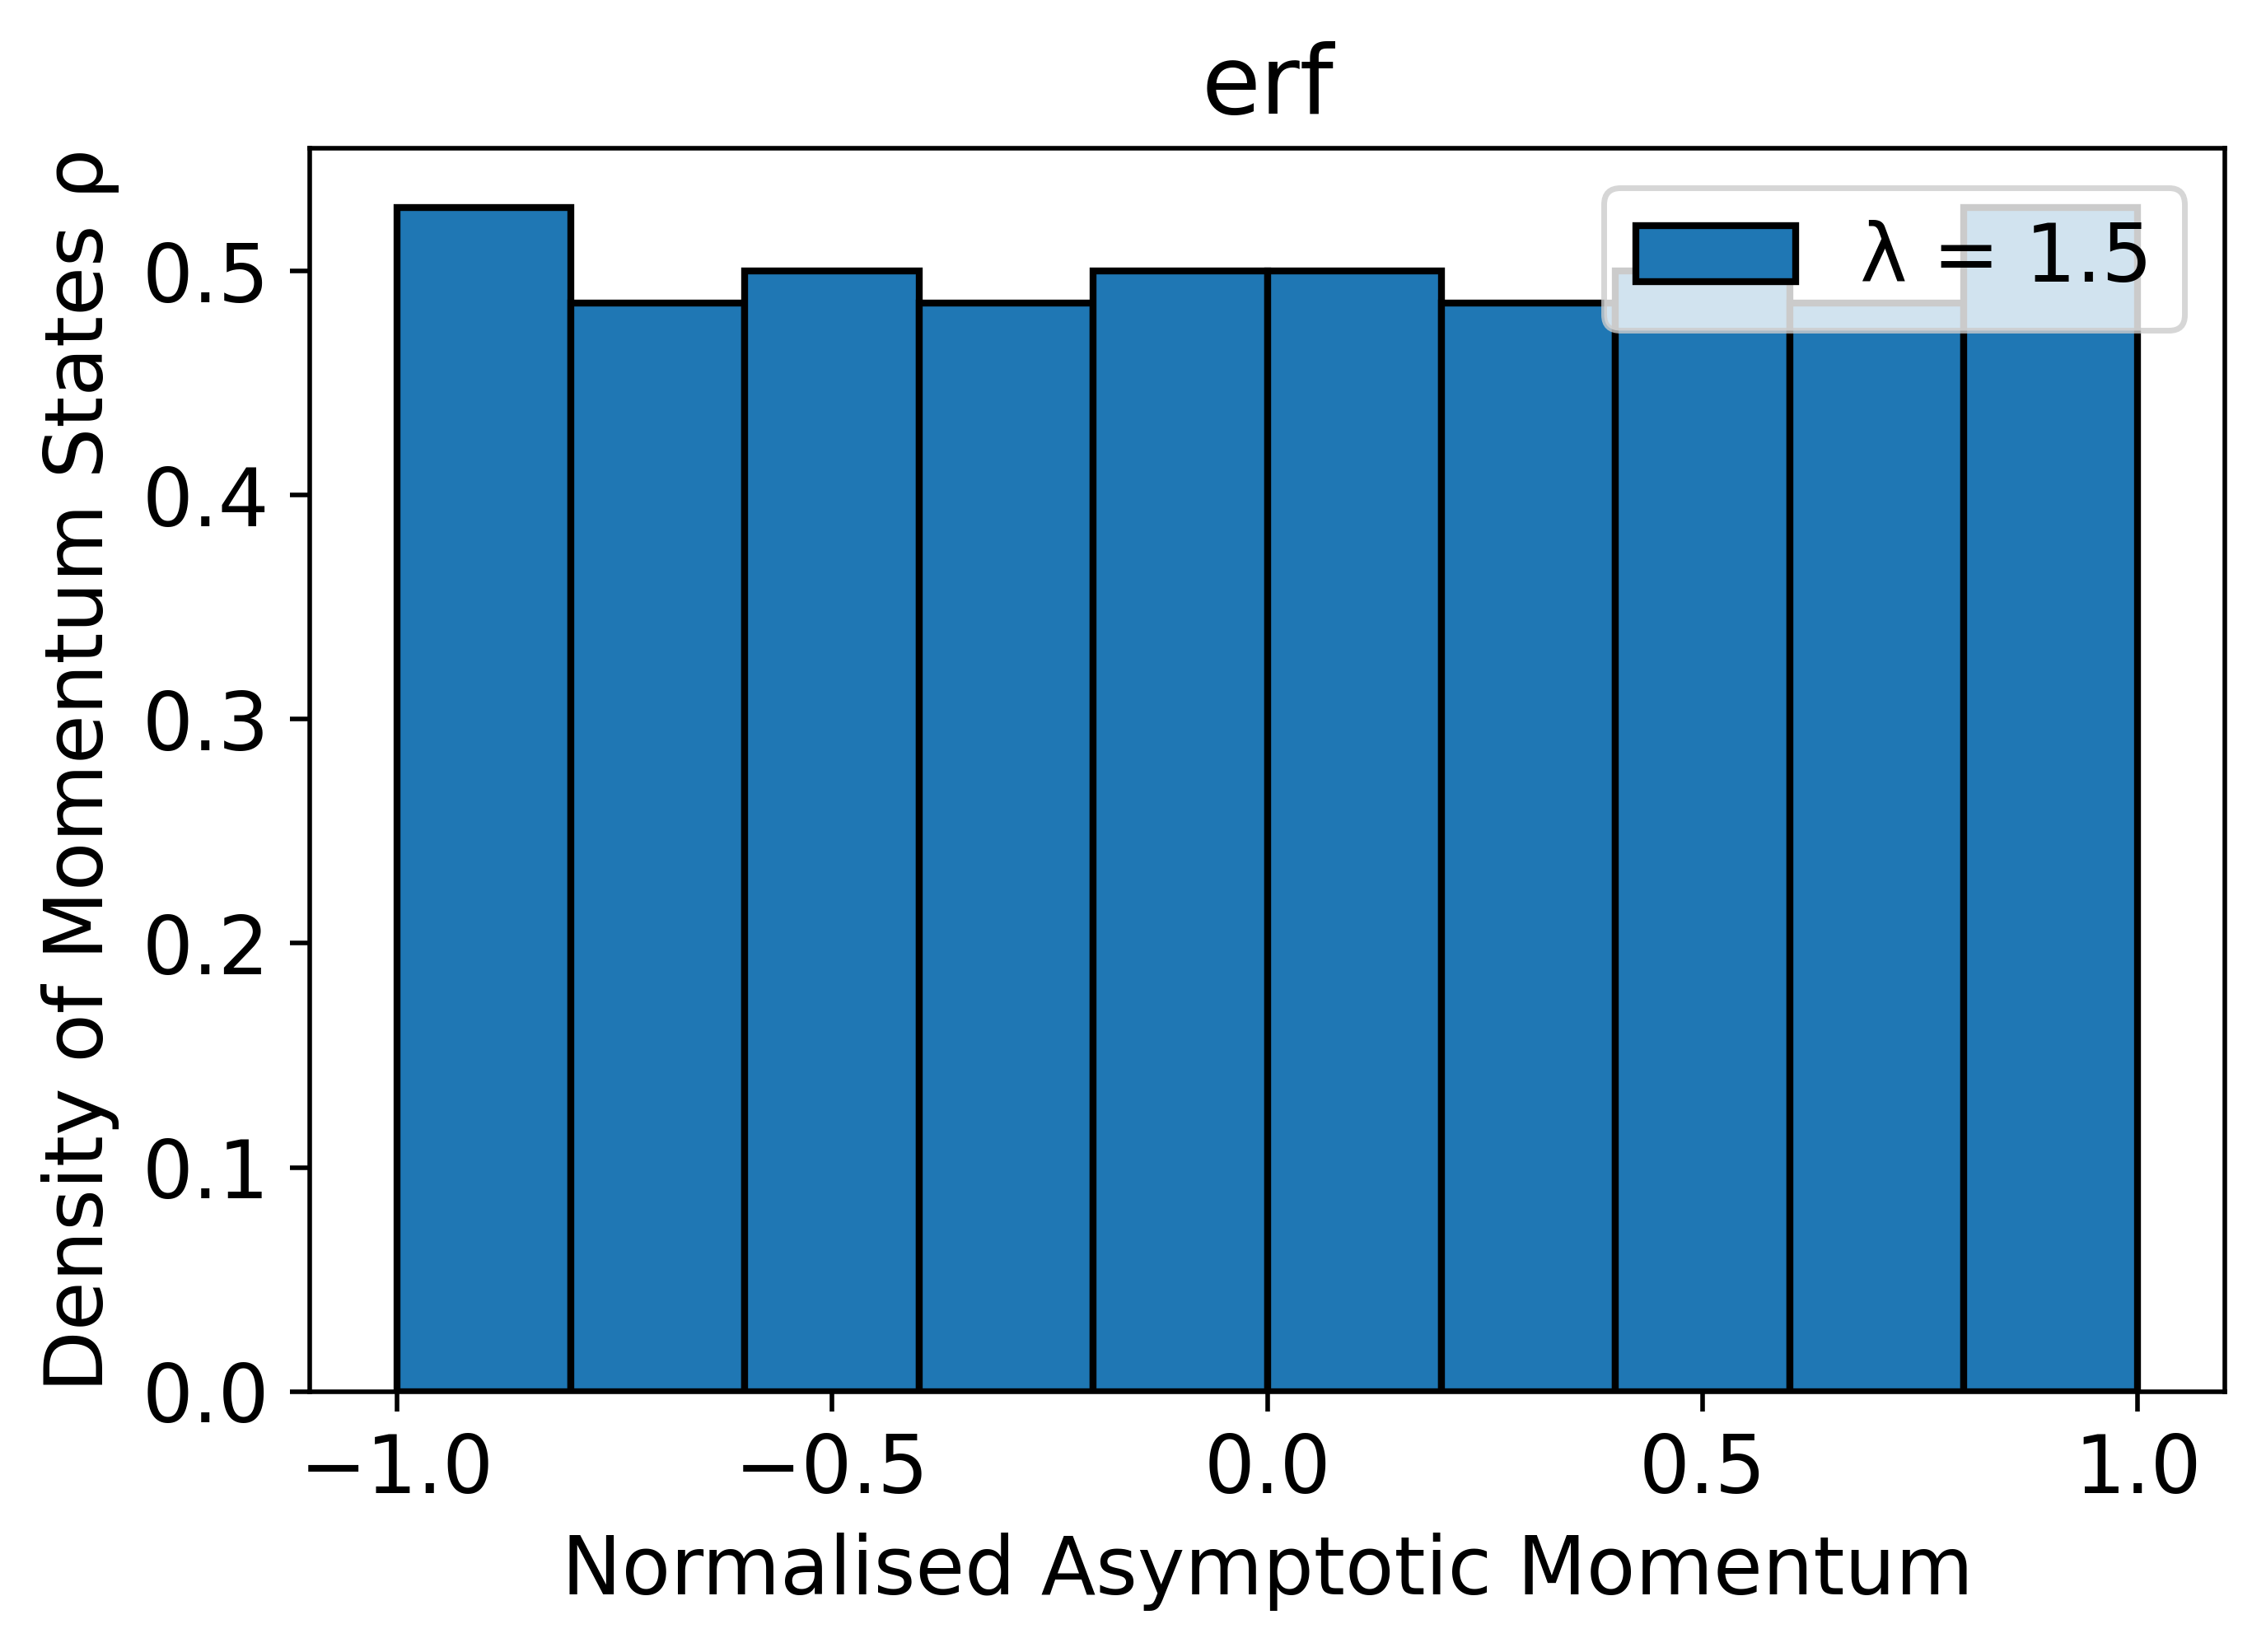

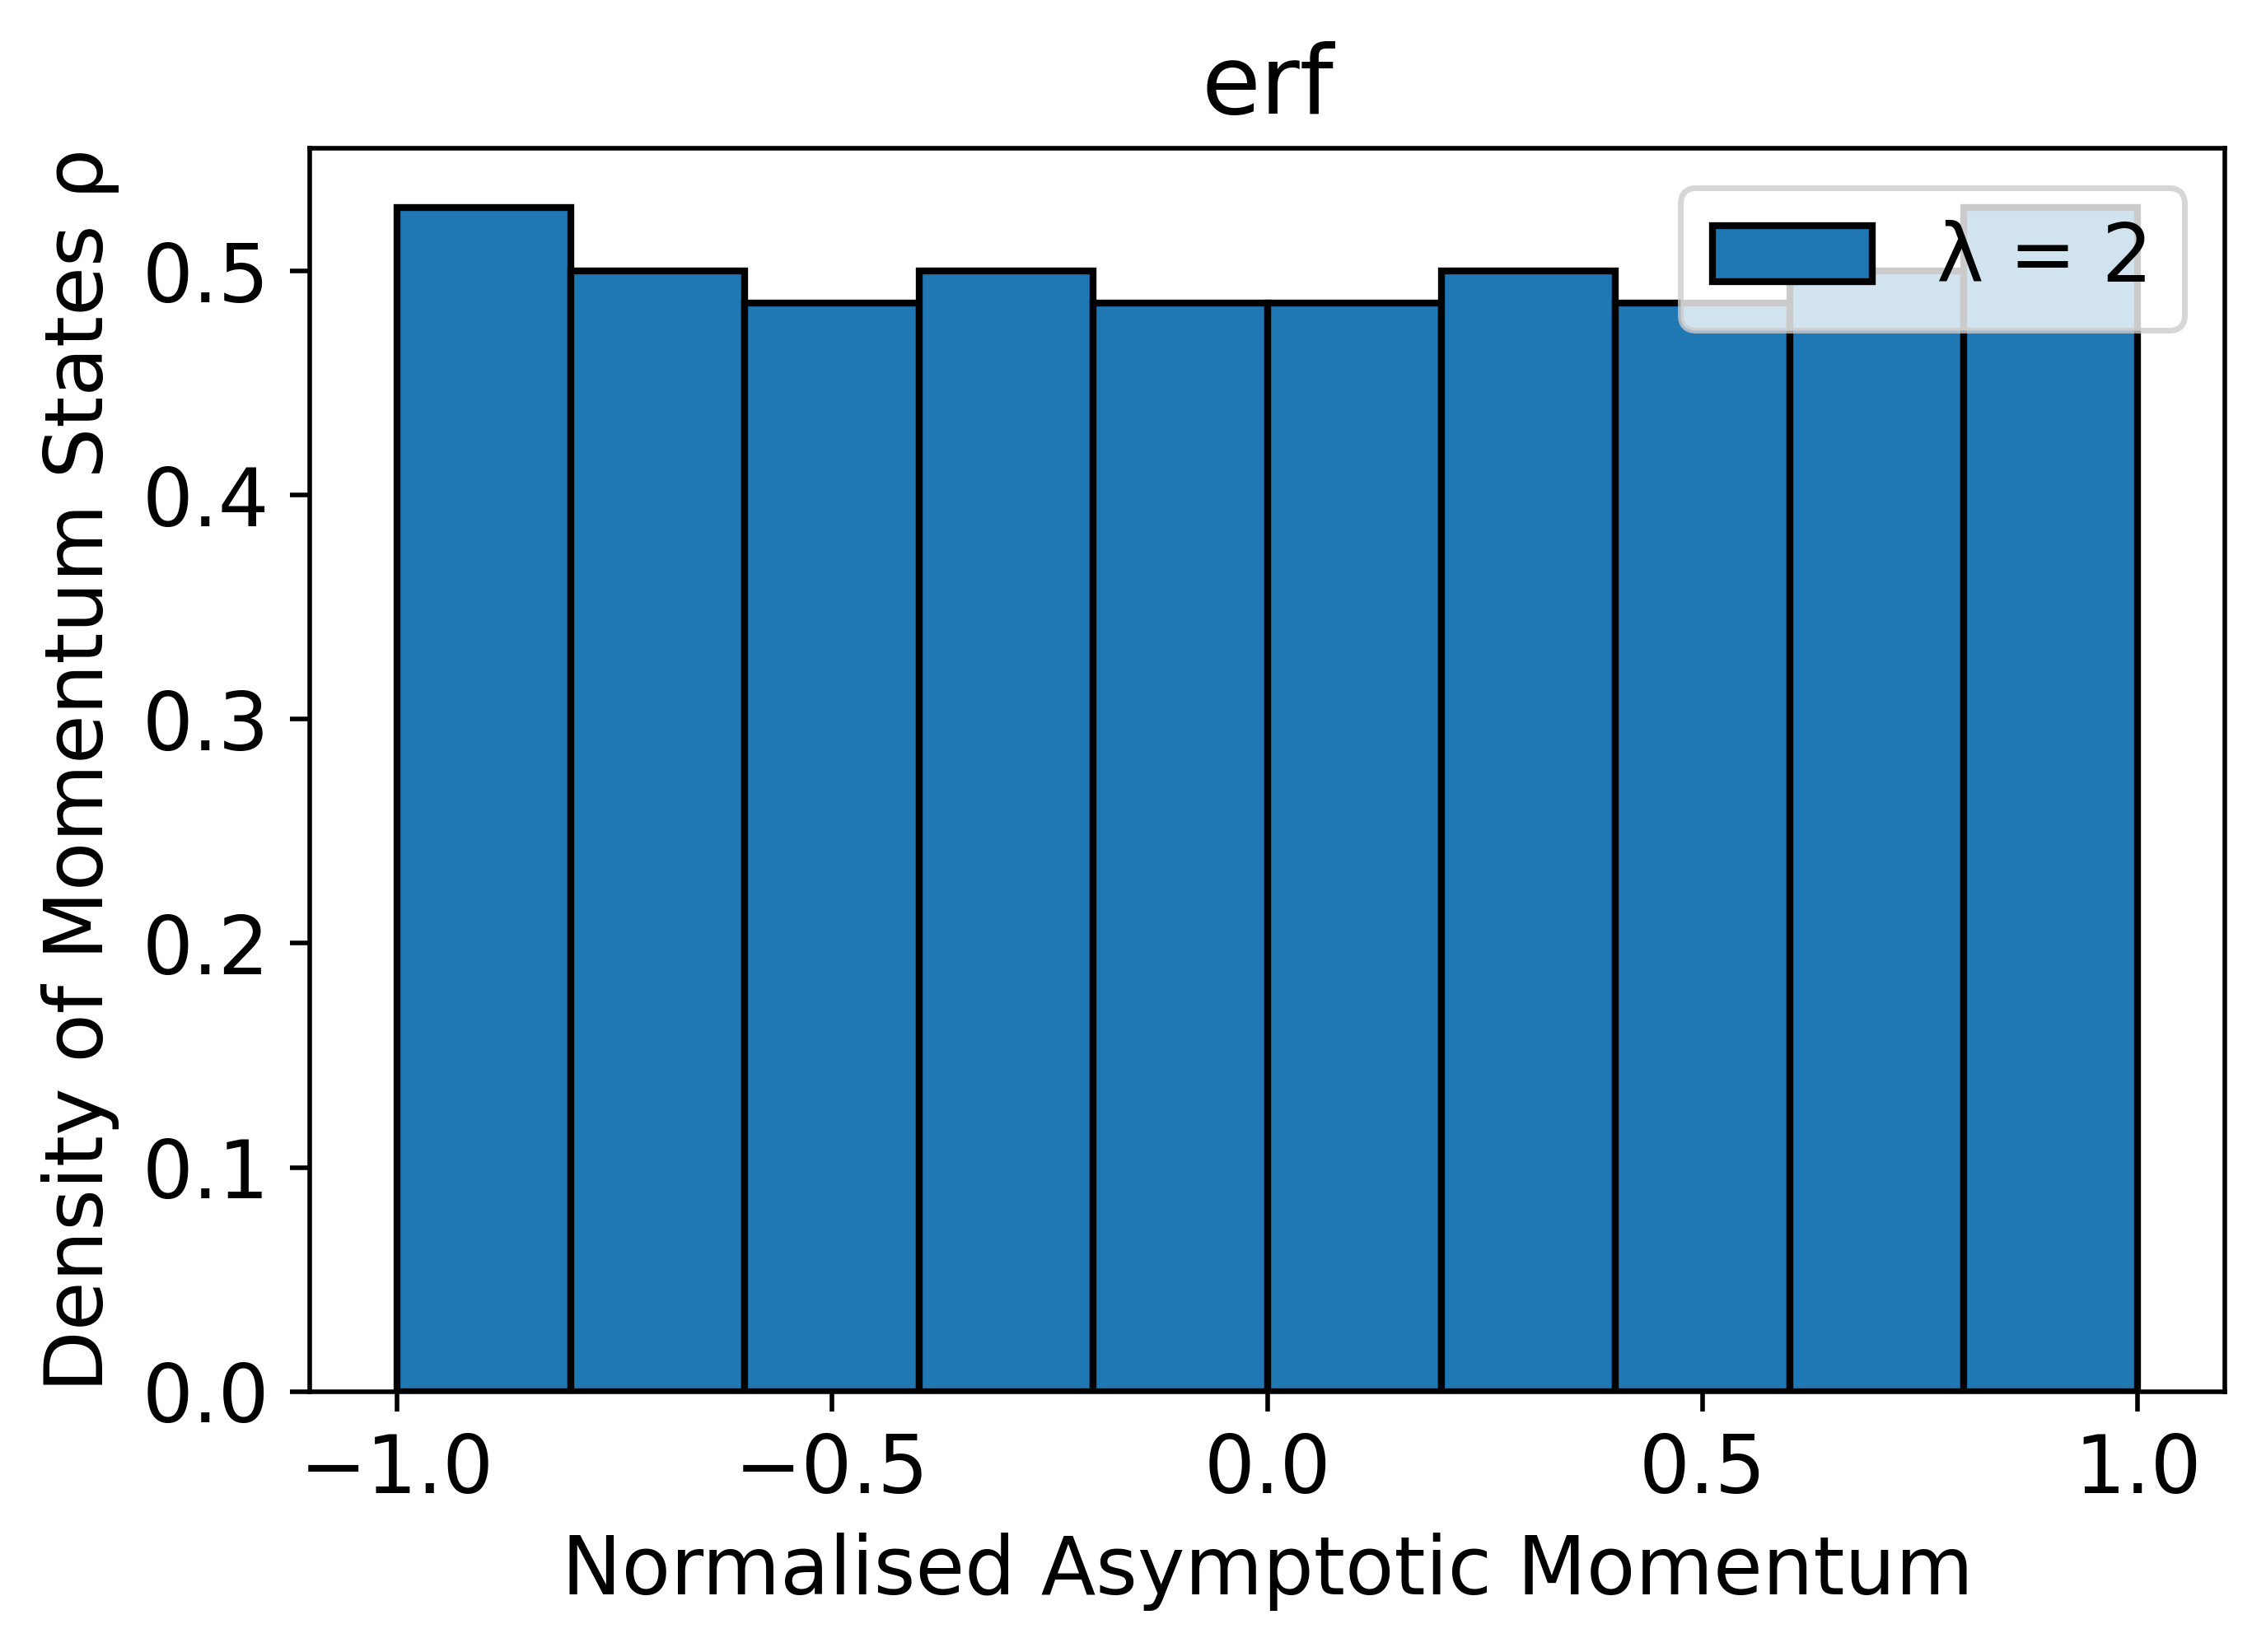

In [13]:
for i in range(np.size(λs)):
    plt.figure(dpi=500)
    plt.xlabel('Normalised Asymptotic Momentum')
    plt.ylabel('Density of Momentum States ρ')
    plt.title('erf')
    plt.hist(np.hstack(normks[i][-1]), density = True, bins = 'auto', label = "λ = %g"%λs[i], edgecolor = 'black', linewidth = 1.2)
    plt.legend()
    plt.show()